In [626]:
import os

In [2]:
import pandas as pd

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [112]:
# Scaling to standard scaler
from sklearn.preprocessing import StandardScaler

In [4]:
import pyod

In [3]:
!ls "/home/ubuntu/Zabbix/Data/SRV_Data/SRV_CORR_ANALYSIS/FEATURES/"

Initial_Test			  SRV_FR_SQLN_03_BFC_Feat22.csv
Pearson				  SRV_FR_SQLN_03_BFC_Feat_MinMax_Scaled_22.csv
ReCor				  SRV_FR_SQLN_03_BFC_Feat_Scaled_22.csv
SRV-FR-SQLN-03_BFC		  SRV_FR_SQLN_03_BFC_MIN_MAX_SCALED_83.csv
SRV-FR-SQLN-03_BFC_OLD		  SRV_FR_SQLN_03_BFC_STD_SCALED_83.csv
SRV_FR_SQLN_03_BFC_ACTUAL_83.csv


In [4]:
df_83 = pd.read_csv("/home/ubuntu/Zabbix/Data/SRV_Data/SRV_CORR_ANALYSIS/FEATURES/SRV_FR_SQLN_03_BFC_ACTUAL_83.csv")

In [5]:
df_83.shape

(45553, 84)

In [6]:
df_83.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45553 entries, 0 to 45552
Data columns (total 84 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Date_Time                                                                                                45553 non-null  object 
 1   SQL Server, Errors: Errors/sec (DB Offline Errors)                                                       45553 non-null  float64
 2   SQL Server working set                                                                                   45553 non-null  float64
 3   Incoming network traffic on Amazon Elastic Network Adapter                                               45553 non-null  float64
 4   SQL Server, Access Methods: Forwarded Records per second                          

In [7]:
df_83.isnull().sum().sum()

0

In [11]:
df_83['SQL Server, Buffer Manager: % Buffer cache hit ratio'].value_counts()

100.000000    41691
99.985393      3307
99.999800        16
99.999700         8
96.551700         7
              ...  
99.988200         1
99.383700         1
99.877300         1
99.346400         1
98.232200         1
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, Length: 426, dtype: int64

/home/ubuntu/anaconda3/envs/zabbix/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


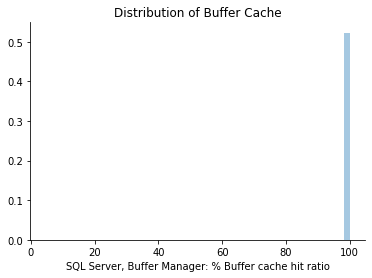

In [12]:
sns.distplot(df_83['SQL Server, Buffer Manager: % Buffer cache hit ratio'])
plt.title("Distribution of Buffer Cache")
sns.despine()

In [13]:
print("Skewness: %f" % df_83['SQL Server, Buffer Manager: % Buffer cache hit ratio'].skew())
print("Kurtosis: %f" % df_83['SQL Server, Buffer Manager: % Buffer cache hit ratio'].kurt())

Skewness: -148.845429
Kurtosis: 26918.539768


In [20]:
# # df_83['SQL Server, Buffer Manager: % Buffer cache hit ratio'].plot(kind='hist')

# plt.hist(df_83['SQL Server, Buffer Manager: % Buffer cache hit ratio'], color = 'blue', edgecolor = 'black',
#          bins = int(50/1))

In [22]:
df_83['SQL Server, Buffer Manager: % Buffer cache hit ratio'].describe()

count    45553.000000
mean        99.985393
std          0.511295
min          4.529600
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64

## Buffer Col

In [38]:
buffer_col = [x for x in list(df_83.columns) if 'Buffer' in x]
# df_83[0:2,df_83.columns.str.contains('Buffer')].columns

In [524]:
buffer_col

['SQL Server, Buffer Manager: Lazy writes/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Buffer Manager: Target pages',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'SQL Server, Buffer Manager: Page writes/sec',
 'SQL Server, Buffer Manager: Page reads/sec',
 'SQL Server, Buffer Manager: Free list stalls/sec',
 'SQL Server, Buffer Manager: Page lookups/sec',
 'SQL Server, Buffer Manager: % Buffer cache hit ratio']

In [527]:
len([x for x in list(df_11.columns) if 'SQL Server' in x])

56

# Differnet Columns / Features in df_11 

In [528]:
sql_col = [x for x in list(df_11.columns) if 'SQL Server' in x]

In [538]:
disk_space_col = [x for x in list(df_11.columns) if  'disk space' in x ]

In [539]:
len(list(df_11.columns)) - (len(sql_col) + len(disk_space_col))

11

In [547]:
traffic_col = [x for x in list(df_11.columns) if x not in sql_col and x not in disk_space_col and \
               (x not in ['Free memory', 'Processor load (5 min average)', 'Processor load (15 min average)'])]

In [548]:
traffic_col

['Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000',
 'Incoming network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000',
 'Incoming network traffic on vmxnet3 Ethernet Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000',
 'Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000',
 'Outgoing network traffic on Microsoft Kernel Debug Network Adapter',
 'Incoming network traffic on vmxnet3 Ethernet Adapter',
 'Outgoing network traffic on vmxnet3 Ethernet Adapter',
 'Incoming network traffic on Microsoft Kernel Debug Network Adapter']

In [529]:
# sql_col

['SQL Server, Locks: Lock Waits per second (Total)',
 'SQL Server, Buffer Manager: Page reads/sec',
 'SQL Server, Locks: Number of Deadlocks/sec (Total)',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'SQL Server, Statistics: Failed Auto-Params/sec',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'SQL Server, Errors: Errors/sec (DB Offline Errors)',
 'SQL Server, Buffer Manager: Free list stalls/sec',
 'SQL Server, Cache: Cache Pages',
 'SQL Server: Logins/sec',
 'SQL Server, Statistics: Unsafe Auto-Params/sec',
 'SQL Server, Buffer Manager: Page lookups/sec',
 'SQL Server, Access Methods: Work files created/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Memory Manager: Total Server Memory',
 'SQL Server: % Processor Time',
 'SQL Server, Statistics: SQL Re-Compilations/sec',
 'SQL Server, Statistics: Safe Auto-Params/sec',
 'SQL Server, Statistics: SQL Compilations/Sec',
 'SQL Server, Access Me

In [550]:
df_11['Free memory'].describe()

count    4.527000e+04
mean     1.724273e+09
std      3.035855e+08
min      8.797430e+08
25%      1.496732e+09
50%      1.728369e+09
75%      1.895277e+09
max      2.519085e+09
Name: Free memory, dtype: float64

# K-means

In [24]:
from sklearn.cluster import KMeans

In [676]:
# df_83.columns

Index(['Date_Time', 'SQL Server, Errors: Errors/sec (DB Offline Errors)',
       'SQL Server working set',
       'Incoming network traffic on Amazon Elastic Network Adapter',
       'SQL Server, Access Methods: Forwarded Records per second',
       'SQL Server, Buffer Manager: Lazy writes/sec',
       'SQL Server, Buffer Manager: Read-ahead pages/sec',
       'SQL Server, Cache: Cache Object Counts',
       'SQL Server, Cache: Cache Hit Ratio',
       'SQL Server, Cache: Cache Objects in use',
       'SQL Server, Locks: Lock Wait Time (Total)',
       'SQL Server, Memory Manager: Memory Grants Pending',
       'SQL Server, Locks: Average Wait Time (Total)',
       'SQL Server, Access Methods: Page Splits/sec',
       'SQL Server, Buffer Manager: Target pages',
       'SQL Server: % Processor Time',
       'SQL Server, Locks: Lock Timeouts/sec (Total)',
       'Incoming network traffic on AWS PV Network Device #2',
       'Total disk space on D:', 'Total disk space on H:',
       'SQL 

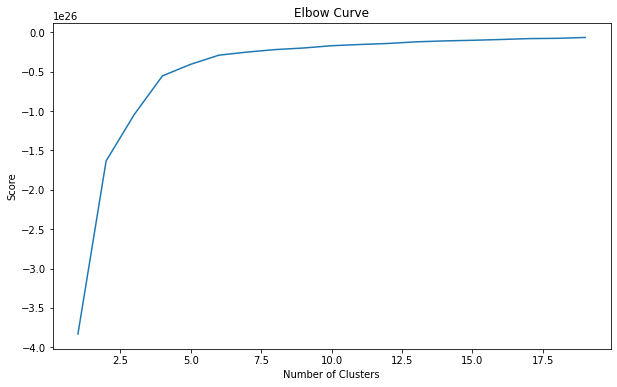

In [677]:
data = df_83.iloc[:,1:]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

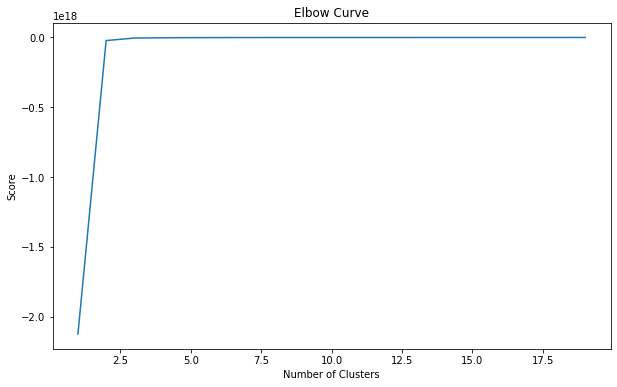

In [41]:
data = df_83[buffer_col]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

- Elbow curve is straight after 2 so we take our cluster as 2

In [42]:
X = df_83[buffer_col]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=2)
km.fit(X)
km.predict(X)
labels = km.labels_



In [54]:
X['cluster'] = labels

In [55]:
X.head()

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio",cluster
0,0.0,0.0,31588352.0,1258556.0,272.954600,0.0,0.0,0.0000,0.0,7010.997108,100.0,1
1,0.0,0.0,31588352.0,1258564.0,273.938100,0.0,0.0,0.0000,0.0,98.462400,100.0,1
2,0.0,0.0,31588352.0,1258588.0,274.955000,0.0,0.0,23.6307,0.0,98.459900,100.0,1
3,0.0,0.0,31588352.0,1258588.0,275.955200,0.0,0.0,0.0000,0.0,7010.997108,100.0,1
4,0.0,0.0,31588352.0,1258588.0,1095.889318,0.0,0.0,0.0000,0.0,0.000000,100.0,1


In [58]:
X.cluster.value_counts()

0    43440
1     2113
Name: cluster, dtype: int64

# Descriptive Study

## Buffer cache hit ratio

In [62]:
X['SQL Server, Buffer Manager: % Buffer cache hit ratio'].describe()

count    45553.000000
mean        99.985393
std          0.511295
min          4.529600
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64

In [67]:
X[X['cluster'] == 1]['SQL Server, Buffer Manager: % Buffer cache hit ratio'].describe()

count    2113.000000
mean       99.981546
std         0.269795
min        92.857100
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64

In [68]:
X[X['cluster'] == 0]['SQL Server, Buffer Manager: % Buffer cache hit ratio'].describe()

count    43440.000000
mean        99.985581
std          0.520191
min          4.529600
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64

## Page life expectancy(PLE)

In [71]:
X['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    45553.000000
mean      1095.889318
std       1584.839247
min          0.100000
25%        125.191700
50%        543.242000
75%       1095.889318
max       7635.793500
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

In [74]:
X[X['cluster'] == 0]['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    43440.000000
mean      1141.569850
std       1607.626347
min          0.100000
25%        149.830000
50%        590.901500
75%       1095.889318
max       7635.793500
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

In [72]:
X[X['cluster'] == 1]['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    2113.000000
mean      156.768505
std       302.290609
min         0.116700
25%        11.585700
50%        23.254700
75%       136.710700
max      1095.889318
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

# Isolation Forest

In [132]:
data = df_83.copy()

In [133]:
# data = df_83[buffer_col] ### trying with only buffer columns
data.set_index('Date_Time', inplace = True)
# data = data.iloc[:,1:]

In [134]:
data_col = [x for x in list(df_83.columns) if x != 'Date_Time']

In [135]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.values)

In [136]:
data = pd.DataFrame(data_scaled)

In [137]:
# data.columns = buffer_col
data.columns = data_col

In [138]:
data.head()

,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use","SQL Server, Locks: Lock Wait Time (Total)",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
0,0.0,-0.774851,-0.249347,0.0,-0.006789,-0.049318,-1.193094,0.260534,-0.861726,-0.00484,...,0.0,-0.970465,-0.081545,4.300597,-0.142732,-0.011236,-0.004764,0.028568,-3.958697,-0.045448
1,0.0,-0.774851,-0.248177,0.0,-0.006789,-0.049318,-1.193094,0.260534,-0.861726,-0.00484,...,0.0,-0.970462,-0.081545,4.230429,-0.142821,-0.011236,-0.004764,0.028568,-3.958697,-0.045448
2,0.0,-0.774851,-0.249195,0.0,-0.006789,-0.049318,-1.193094,0.260534,-0.861726,-0.00484,...,0.0,-0.970429,-0.081545,3.980944,-0.142803,-0.011236,-0.004764,0.028568,-3.958697,-0.045448
3,0.0,-0.774851,-0.249209,0.0,-0.006789,-0.049318,-1.193094,0.260534,-0.861726,-0.00484,...,0.0,-0.970425,-0.081545,3.489770,-0.142803,-0.011236,-0.004764,0.028568,-3.958697,-0.045448
4,0.0,-0.774851,-0.249185,0.0,-0.006789,-0.049318,-1.193094,0.260534,-0.861726,-0.00484,...,0.0,-0.970425,-0.081545,3.474177,-0.142821,0.031356,-0.004764,0.028568,-3.958697,-0.045448


In [139]:
outliers_fraction = 0.001
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 

IsolationForest(contamination=0.001)

In [146]:
pd.Series(model.predict(data)).value_counts()

 1    45507
-1       46
dtype: int64

In [147]:
data['Anomaly_IF'] = pd.Series(model.predict(data))

In [148]:
data['Anomaly_IF'].value_counts(normalize = True)

 1    0.99899
-1    0.00101
Name: Anomaly_IF, dtype: float64

In [149]:
data.shape

(45553, 84)

In [150]:
df_83[data['Anomaly_IF'] == -1]

,Date_Time,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
106,2020-06-16 07:03:00,0.0,1.356920e+08,95599480.0,0.0,0.000000,7.876700,139.000000,80.22390,1.000000,...,0.0,1.303871e+10,0.00000,0.000800,159953.495000,0.000000,0.000000,100.000000,9.793782e+09,0.00000
152,2020-06-16 07:49:00,0.0,1.629300e+08,469200.0,0.0,0.000000,0.000000,219.463929,78.12882,1.633951,...,0.0,1.730568e+10,0.03805,0.004039,53.165400,0.333300,0.000022,99.985393,1.558719e+10,0.00000
162,2020-06-16 08:02:00,0.0,1.629300e+08,339424.0,0.0,0.000000,3.546871,139.000000,80.46610,1.000000,...,0.0,1.730568e+10,0.00000,0.001700,182.149600,0.000000,0.000022,99.985393,1.026613e+10,0.00000
167,2020-06-16 08:14:00,0.0,1.629300e+08,7038328.0,0.0,0.140732,3.546871,139.000000,80.21740,1.000000,...,0.0,1.730568e+10,0.00000,0.001700,7920.103355,0.131904,0.000022,100.000000,9.885082e+09,0.00000
168,2020-06-16 08:18:00,0.0,1.358400e+08,11063152.0,0.0,0.000000,3.546871,139.000000,79.85070,1.000000,...,0.0,1.730568e+10,0.03805,0.001500,56.121400,0.000000,0.000022,100.000000,1.558719e+10,0.00000
169,2020-06-16 08:20:00,0.0,1.358920e+08,8220736.0,0.0,0.000000,0.000000,139.000000,78.12882,1.633951,...,0.0,1.301575e+10,0.03805,0.001400,319840.759900,0.000000,0.000022,100.000000,1.558719e+10,0.00000
170,2020-06-16 08:22:00,0.0,1.629300e+08,7085848.0,0.0,0.000000,0.000000,139.000000,79.85070,1.000000,...,0.0,1.730568e+10,0.03805,0.001300,53.160600,0.500000,0.000022,100.000000,1.558719e+10,0.04543
172,2020-06-16 08:25:00,0.0,1.629300e+08,7448832.0,0.0,0.140732,7.876900,139.000000,79.85070,1.633951,...,0.0,1.730568e+10,0.00000,0.004039,67.940700,0.000000,0.000022,99.985393,9.806070e+09,0.04543
173,2020-06-16 08:25:00,0.0,1.359440e+08,10677384.0,0.0,0.000000,7.876900,139.000000,79.85070,1.000000,...,0.0,1.302411e+10,0.03805,0.004039,160.491400,0.000000,0.000000,99.985393,1.558719e+10,0.04543
184,2020-06-16 08:36:00,0.0,1.360600e+08,26348144.0,0.0,0.140732,0.000000,139.000000,79.20640,1.000000,...,0.0,1.301461e+10,0.03805,0.001400,55.139200,0.000000,0.000000,100.000000,1.558719e+10,0.00000


# Descriptive Stats

## Buffer Cache Hit

In [154]:
df_83['SQL Server, Buffer Manager: % Buffer cache hit ratio'].describe()

count    45553.000000
mean        99.985393
std          0.511295
min          4.529600
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64

In [155]:
df_83[data['Anomaly_IF'] == -1]['SQL Server, Buffer Manager: % Buffer cache hit ratio'].describe()

count     46.000000
mean      99.994284
std        0.007207
min       99.985393
25%       99.985393
50%      100.000000
75%      100.000000
max      100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64

In [156]:
df_83[data['Anomaly_IF'] == 1]['SQL Server, Buffer Manager: % Buffer cache hit ratio'].describe()

count    45507.000000
mean        99.985384
std          0.511553
min          4.529600
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64

## Page Life Expectancy (PLE)

In [151]:
df_83['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    45553.000000
mean      1095.889318
std       1584.839247
min          0.100000
25%        125.191700
50%        543.242000
75%       1095.889318
max       7635.793500
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

In [152]:
df_83[data['Anomaly_IF'] == -1]['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count      46.000000
mean      138.441034
std       311.339074
min         4.384200
25%         9.593575
50%        14.919650
75%        45.959200
max      1095.889318
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

In [153]:
df_83[data['Anomaly_IF'] == 1]['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    45507.000000
mean      1096.857139
std       1585.317309
min          0.100000
25%        125.891850
50%        544.608900
75%       1095.889318
max       7635.793500
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

In [157]:
X.shape

(45553, 13)

In [535]:
# All 46 Anomaly for PLE and Buffer cache 
df_83[data['Anomaly_IF'] == -1][['Date_Time','SQL Server, Buffer Manager: Page life expectancy(PLE)','SQL Server, Buffer Manager: % Buffer cache hit ratio']]

,Date_Time,"SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: % Buffer cache hit ratio"
106,2020-06-16 07:03:00,344.602200,100.000000
152,2020-06-16 07:49:00,9.868600,99.985393
162,2020-06-16 08:02:00,11.168900,99.985393
167,2020-06-16 08:14:00,11.168900,100.000000
168,2020-06-16 08:18:00,11.168900,100.000000
169,2020-06-16 08:20:00,6.968100,100.000000
170,2020-06-16 08:22:00,6.968100,100.000000
172,2020-06-16 08:25:00,6.968100,99.985393
173,2020-06-16 08:25:00,1095.889318,99.985393
184,2020-06-16 08:36:00,14.119500,100.000000


In [169]:
df_83[df_83['Date_Time'] == '2020-06-21 12:01:00'][['Date_Time','SQL Server, Buffer Manager: Page life expectancy(PLE)','SQL Server, Buffer Manager: % Buffer cache hit ratio']]

,Date_Time,"SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: % Buffer cache hit ratio"
7299,2020-06-21 12:01:00,672.5345,4.5296


In [168]:
df_83[df_83['Date_Time'] == '2020-06-16 08:25:00'][['Date_Time','SQL Server, Buffer Manager: Page life expectancy(PLE)','SQL Server, Buffer Manager: % Buffer cache hit ratio']] 

,Date_Time,"SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: % Buffer cache hit ratio"
172,2020-06-16 08:25:00,6.968100,99.985393
173,2020-06-16 08:25:00,1095.889318,99.985393


In [170]:
df_83[df_83['Date_Time'] == '2020-06-17 08:25:00'][['Date_Time','SQL Server, Buffer Manager: Page life expectancy(PLE)','SQL Server, Buffer Manager: % Buffer cache hit ratio']] 

,Date_Time,"SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: % Buffer cache hit ratio"
1559,2020-06-17 08:25:00,323.198,100.0


In [172]:
df_83[df_83['Date_Time'] == '2020-06-18 08:26:00'][['Date_Time','SQL Server, Buffer Manager: Page life expectancy(PLE)','SQL Server, Buffer Manager: % Buffer cache hit ratio']] 

,Date_Time,"SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: % Buffer cache hit ratio"
2882,2020-06-18 08:26:00,277.9222,100.0


In [173]:
df_83[df_83['Date_Time'] == '2020-06-19 08:25:00'][['Date_Time','SQL Server, Buffer Manager: Page life expectancy(PLE)','SQL Server, Buffer Manager: % Buffer cache hit ratio']] 

,Date_Time,"SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: % Buffer cache hit ratio"
4284,2020-06-19 08:25:00,254.4342,99.985393


# Def IF

In [ ]:
def isolation_forest_anomaly_detection(df, 
                                       column_name, 
                                       outliers_fraction):
    """
    In this definition, time series anomalies are detected using an Isolation Forest algorithm.
    Arguments:
        df: Pandas dataframe
        column_name: string. Name of the column that we want to detect anomalies in
        outliers_fraction: float. Percentage of outliers allowed in the sequence.
    Outputs:
        df: Pandas dataframe with column for detected Isolation Forest anomalies (True/False)
    """
    #Scale the column that we want to flag for anomalies
    min_max_scaler = preprocessing.StandardScaler()
    np_scaled = min_max_scaler.fit_transform(df[[column_name]])
    scaled_time_series = pd.DataFrame(np_scaled)
    # train isolation forest 
    model =  IsolationForest(contamination = outliers_fraction, behaviour='new')
    model.fit(scaled_time_series)
    #Generate column for Isolation Forest-detected anomalies
    isolation_forest_anomaly_column = column_name+'_Isolation_Forest_Anomaly'
    df[isolation_forest_anomaly_column] = model.predict(scaled_time_series)
    df[isolation_forest_anomaly_column] = df[isolation_forest_anomaly_column].map( {1: False, -1: True} )
    return df

# SRV-FR-SQLN-11_Processed

In [175]:
df_11 = pd.read_csv('/home/ubuntu/Zabbix/Data/SRV_Data/SRV_Processed/SRV-FR-SQLN-11_Processed.csv')

In [186]:
df_11.head()

,Timestamp,Total disk space on K:,Total disk space on J:,Total disk space on N:\LOGS,Total disk space on N:,"SQL Server, Locks: Lock Waits per second (Total)","SQL Server, Buffer Manager: Page reads/sec",Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000,"SQL Server, Locks: Number of Deadlocks/sec (Total)",Free disk space on V:,...,Total disk space on P:\LOGS,"SQL Server, Locks: Average Wait Time (Total)",Free disk space on R:\LOGS,Free disk space on G:,Free disk space on N:\LOGS,Free disk space on H:\LOGS,Free disk space on Q:,"SQL Server, Memory Manager: Memory Grants Pending",Free disk space on S:,"SQL Server, Cache: Cache Hit Ratio"
0,2020-06-16 05:17:00,NaN,NaN,NaN,NaN,0.0,0.0,1914432.0,0.0,1.661783e+10,...,NaN,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,81.8883
1,2020-06-16 05:18:00,NaN,NaN,NaN,NaN,0.0,0.0,1760608.0,0.0,1.661783e+10,...,NaN,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,87.7246
2,2020-06-16 05:19:00,NaN,NaN,NaN,NaN,0.0,0.0,1820848.0,0.0,1.661783e+10,...,NaN,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,81.2514
3,2020-06-16 05:20:00,NaN,NaN,NaN,NaN,0.0,0.0,1720624.0,0.0,1.661783e+10,...,NaN,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,86.2335
4,2020-06-16 05:21:00,NaN,NaN,NaN,NaN,0.0,0.0,2609184.0,0.0,1.661783e+10,...,NaN,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,84.1061


In [189]:
df_11.info()           #[df_11['Timestamp' == '2020-06-16 05:17:00']] #'2020-06-20 07:04:00']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45270 entries, 0 to 45269
Columns: 136 entries, Timestamp to SQL Server, Cache: Cache Hit Ratio
dtypes: float64(134), int64(1), object(1)
memory usage: 47.0+ MB


In [193]:
# Missing value
df_11.isnull().sum().sum()

1647653

In [198]:
# df_11 columns 
list(df_11.columns)

['Timestamp',
 'Total disk space on K:',
 'Total disk space on J:',
 'Total disk space on N:\\LOGS',
 'Total disk space on N:',
 'SQL Server, Locks: Lock Waits per second (Total)',
 'SQL Server, Buffer Manager: Page reads/sec',
 'Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000',
 'SQL Server, Locks: Number of Deadlocks/sec (Total)',
 'Free disk space on V:',
 'Total disk space on Q:\\LOGS',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'Free disk space on F:',
 'Free disk space on N:',
 'Total disk space on G:',
 'Processor load (5 min average)',
 'Incoming network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000',
 'Total disk space on I:\\LOGS',
 'SQL Server, Statistics: Failed Auto-Params/sec',
 'SQL Server, Buffer Manager: Database pages',
 'Total disk space on H:\\LOGS',
 'Free disk space on P:',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'Total disk space on F:',
 'SQL Server

In [199]:
# Missing value treatment
# Missing Value Treatment
df_11 = df_11.set_index('Timestamp').fillna(df_11.mean())
print(df_11.isnull().sum())

Total disk space on K:                               0
Total disk space on J:                               0
Total disk space on N:\LOGS                          0
Total disk space on N:                               0
SQL Server, Locks: Lock Waits per second (Total)     0
                                                    ..
Free disk space on H:\LOGS                           0
Free disk space on Q:                                0
SQL Server, Memory Manager: Memory Grants Pending    0
Free disk space on S:                                0
SQL Server, Cache: Cache Hit Ratio                   0
Length: 135, dtype: int64


In [201]:
df_11.index

Index(['2020-06-16 05:17:00', '2020-06-16 05:18:00', '2020-06-16 05:19:00',
       '2020-06-16 05:20:00', '2020-06-16 05:21:00', '2020-06-16 05:22:00',
       '2020-06-16 05:23:00', '2020-06-16 05:24:00', '2020-06-16 05:25:00',
       '2020-06-16 05:26:00',
       ...
       '2020-07-20 01:04:00', '2020-07-20 01:05:00', '2020-07-20 01:06:00',
       '2020-07-20 01:07:00', '2020-07-20 01:08:00', '2020-07-20 01:09:00',
       '2020-07-20 01:10:00', '2020-07-20 01:11:00', '2020-07-20 01:12:00',
       '2020-07-20 01:13:00'],
      dtype='object', name='Timestamp', length=45270)

In [202]:
df_11.shape

(45270, 135)

In [203]:
# Copy of df_11

data_11 = df_11.copy()

In [205]:
print(data_11.index.name)
data_11.index.rename('Date_Time', inplace = True)

Timestamp


In [206]:
print(data_11.index.name)

Date_Time


In [207]:
scaler = StandardScaler()
scaler.fit(data_11.values)

StandardScaler()

In [209]:
data_11_scaled = scaler.transform(data_11.values)

In [212]:
data_11_scaled.shape

(45270, 135)

In [ ]:
# data = pd.DataFrame(data_scaled)

In [ ]:
outliers_fraction = 0.001
model_11 =  IsolationForest(contamination=outliers_fraction)
model_11.fit(data_11_scaled) 

In [215]:
pd.Series(model_11.predict(data_11_scaled)).value_counts()

 1    45121
-1      149
dtype: int64

In [216]:
data_11.shape

(45270, 135)

In [222]:
pd.Series(model_11.predict(data_11_scaled))

0        1
1        1
2        1
3        1
4        1
        ..
45265    1
45266    1
45267    1
45268    1
45269    1
Length: 45270, dtype: int64

In [225]:
data_11['Anomaly'] = pd.Series(model_11.predict(data_11_scaled), index = data_11.index)

In [227]:
data_11['Anomaly'].value_counts()

 1    45121
-1      149
Name: Anomaly, dtype: int64

In [231]:
print("Percentage of Anomaly : ", round(149/45270, 3))

Percentage of Anomaly :  0.003


In [233]:
data_11.shape

(45270, 136)

In [658]:
# DecsionScore

data_11_anoamaly_score = pd.Series(model_11.decision_function(data_11_scaled), index = data_11.index)

In [664]:
# data_11_anomaly_score = data_11_anoamaly_score
data_11_anomaly_score.shape


(45270,)

In [665]:
data_11['Anomaly_Score'] = data_11_anomaly_score

In [670]:
# Writing data_11 to csv

# data_11.to_csv('/home/ubuntu/Zabbix/Data/MODEL_DATA/Anomaly_Data/SRV_FR_SQLN_11/SRV_FR_SQLN_11_ANOMALY.csv')

# Exploring Anomaly

In [237]:
buffer_col

['SQL Server, Buffer Manager: Lazy writes/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Buffer Manager: Target pages',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'SQL Server, Buffer Manager: Page writes/sec',
 'SQL Server, Buffer Manager: Page reads/sec',
 'SQL Server, Buffer Manager: Free list stalls/sec',
 'SQL Server, Buffer Manager: Page lookups/sec',
 'SQL Server, Buffer Manager: % Buffer cache hit ratio']

In [238]:
data_11[data_11['Anomaly'] == -1][buffer_col]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio"
Date_Time,,,,,,,,,,,
2020-06-16 10:12:00,0.0000,0.0000,65503232.0,2633911.0,30.989500,0.0,9.8463,382.9560,0.0,133287.8075,99.9944
2020-06-16 14:01:00,344.6305,1493.5017,65503232.0,2625229.0,8.351700,0.0,1788.1131,6.8923,0.0,165051.9207,99.7566
2020-06-16 14:05:00,64.9855,1.9691,65503232.0,2626596.0,8.351700,0.0,315.0356,2960.8238,0.0,89698.3529,99.8896
2020-06-16 14:06:00,0.0000,28.5537,65503232.0,2622892.0,8.551700,0.0,0.0000,1237.6258,0.0,129944.8052,99.9138
2020-06-16 14:12:00,52.1823,7.8766,65503232.0,2636438.0,14.736300,0.0,1542.8842,756.2978,0.0,205252.7959,99.8088
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-11 14:12:00,0.0000,0.0000,65503232.0,2574331.0,145.212400,0.0,0.0000,6.8922,0.0,116071.5551,99.9886
2020-07-12 02:12:00,0.0000,4.9230,65503232.0,2587495.0,11.602300,0.0,1819.5987,24.6141,0.0,75807.7632,99.1643
2020-07-12 03:12:00,28.5537,0.0000,65503232.0,2595894.0,74.637672,0.0,0.0000,5678.1537,0.0,61411.3847,99.4747


In [334]:
list(data_11[ (data_11['Anomaly'] == -1)].index)#[buffer_col_anomaly]

['2020-06-16 10:12:00',
 '2020-06-16 14:01:00',
 '2020-06-16 14:05:00',
 '2020-06-16 14:06:00',
 '2020-06-16 14:12:00',
 '2020-06-16 23:12:00',
 '2020-06-16 23:49:00',
 '2020-06-16 23:51:00',
 '2020-06-16 23:52:00',
 '2020-06-16 23:53:00',
 '2020-06-16 23:54:00',
 '2020-06-16 23:55:00',
 '2020-06-16 23:56:00',
 '2020-06-16 23:57:00',
 '2020-06-16 23:58:00',
 '2020-06-17 00:00:00',
 '2020-06-17 00:01:00',
 '2020-06-17 00:02:00',
 '2020-06-17 00:03:00',
 '2020-06-17 00:04:00',
 '2020-06-17 00:05:00',
 '2020-06-17 00:06:00',
 '2020-06-17 00:07:00',
 '2020-06-17 00:08:00',
 '2020-06-17 00:09:00',
 '2020-06-17 00:10:00',
 '2020-06-17 00:11:00',
 '2020-06-17 00:12:00',
 '2020-06-17 00:13:00',
 '2020-06-17 00:14:00',
 '2020-06-17 00:15:00',
 '2020-06-17 00:16:00',
 '2020-06-17 00:17:00',
 '2020-06-17 00:18:00',
 '2020-06-17 00:19:00',
 '2020-06-17 00:20:00',
 '2020-06-17 00:22:00',
 '2020-06-17 00:23:00',
 '2020-06-17 00:24:00',
 '2020-06-17 00:25:00',
 '2020-06-17 00:26:00',
 '2020-06-17 00:

In [669]:
data_11[data_11['Anomaly'] == -1]['Anomaly_Score'].describe()

count    149.000000
mean      -0.021830
std        0.015706
min       -0.074857
25%       -0.030603
50%       -0.018956
75%       -0.009179
max       -0.000154
Name: Anomaly_Score, dtype: float64

In [667]:
data_11[(data_11.index >= '2020-06-20 00:0:00') & (data_11.index <= '2020-06-21 00:00:00') & (data_11['Anomaly'] == 1)]['Anomaly_Score']

Date_Time
2020-06-20 00:10:00    0.041885
2020-06-20 00:11:00    0.076259
2020-06-20 00:13:00    0.035237
2020-06-20 00:14:00    0.078370
2020-06-20 00:15:00    0.064462
                         ...   
2020-06-20 23:56:00    0.092403
2020-06-20 23:57:00    0.093416
2020-06-20 23:58:00    0.085947
2020-06-20 23:59:00    0.109466
2020-06-21 00:00:00    0.115939
Name: Anomaly_Score, Length: 1425, dtype: float64

In [279]:
buffer_col_anomaly = buffer_col + str('Anomaly').split(",")

In [281]:
data_11[(data_11.index >= '2020-06-20 00:0:00') & (data_11.index <= '2020-06-21 00:00:00') & (data_11['Anomaly'] == -1)][buffer_col_anomaly]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio",Anomaly
Date_Time,,,,,,,,,,,,
2020-06-20 00:12:00,1491.6838,303.2603,65503232.0,2642649.0,9.651900,0.0,1476.8662,1040.6580,0.0,148494.5635,94.1072,-1
2020-06-20 03:12:00,403.6869,0.0000,65503232.0,2631457.0,74.637672,0.0,0.0000,0.0000,0.0,59637.1384,98.5279,-1
2020-06-20 09:12:00,6.8921,26.5843,65503232.0,2617932.0,2.033700,0.0,6.8923,10092.5009,0.0,98135.6017,92.2772,-1
2020-06-20 09:47:00,96.4850,4845.3075,65503232.0,2625620.0,12.085800,0.0,7.8767,12929.9772,0.0,141931.3481,100.0000,-1
2020-06-20 10:12:00,0.9846,0.9846,65503232.0,2623967.0,74.637672,0.0,23.6280,7445.2181,0.0,83014.4716,88.0436,-1
2020-06-20 11:12:00,0.0000,6.8923,65503232.0,2622383.0,11.552300,0.0,0.0000,0.0000,0.0,160661.8359,96.0378,-1


In [282]:
# Plot Anomaly

In [ ]:
# df = df.sort_values('date_time')
# df['date_time_int'] = df.date_time.astype(np.int64)

In [294]:
anomaly_df = data_11[data_11['Anomaly'] == -1][buffer_col]

In [311]:
# data_11[data_11['Anomaly'] == -1]['SQL Server, Buffer Manager: % Buffer cache hit ratio']

np.where(data_11['Anomaly'] == -1, data_11['SQL Server, Buffer Manager: % Buffer cache hit ratio'], None)

(45270,)

# Anomaly Plot - Def

In [327]:
def anomaly_plot(col_name):
    fig, ax = plt.subplots(figsize=(15,10))


    ax.plot(pd.to_datetime(data_11.index), data_11[col_name] , color='blue', label='Normal', alpha = 0.5)
    ax.scatter(pd.to_datetime(data_11.index), np.where(data_11['Anomaly'] == -1, data_11[col_name], None), color='red', label='Anomaly', alpha = 1)
    

    plt.xlabel('Date')
    plt.ylabel(col_name)
    plt.xticks(rotation = '45')
    plt.legend()
    plt.show();

In [407]:
# describe data for anomaly and non anomaly
def anomaly_stats(df, col_name):
    print("-"*61)
    print("*"*10)
    print("Overall Description")
    print("*"*10)
    print(df[col_name].describe())
    
    print('\n')
    print("-"*61)
    print("*"*10)
    print("Anomaly Description")
    print("*"*10)
    print(df[df['Anomaly'] == -1][col_name].describe())
    
    print('\n')
    print("-"*61)
    print("*"*10)
    print("Normal Description")
    print("*"*10)
    print(df[df['Anomaly'] == 1][col_name].describe())

In [409]:
anomaly_stats(data_11, 'SQL Server, Buffer Manager: % Buffer cache hit ratio')

-------------------------------------------------------------
**********
Overall Description
**********
count    45270.000000
mean        99.590418
std          1.554089
min         80.946800
25%         99.976100
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64


-------------------------------------------------------------
**********
Anomaly Description
**********
count    149.000000
mean      99.653550
std        1.528221
min       88.043600
25%       99.993300
50%      100.000000
75%      100.000000
max      100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64


-------------------------------------------------------------
**********
Normal Description
**********
count    45121.000000
mean        99.590210
std          1.554186
min         80.946800
25%         99.976000
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffe

In [410]:
anomaly_stats(data_11,'SQL Server, Buffer Manager: Page life expectancy(PLE)')

-------------------------------------------------------------
**********
Overall Description
**********
count    45270.000000
mean        74.637672
std         77.330437
min          0.000000
25%         17.703500
50%         58.145000
75%         86.813225
max        508.368300
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64


-------------------------------------------------------------
**********
Anomaly Description
**********
count    149.000000
mean      52.323336
std       66.581322
min        1.717000
25%        6.651300
50%       24.738300
75%       74.637672
max      291.191600
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64


-------------------------------------------------------------
**********
Normal Description
**********
count    45121.000000
mean        74.711359
std         77.353432
min          0.000000
25%         17.803600
50%         58.328300
75%         86.984100
max        508.368300
Name: SQL Server, Buf

In [406]:
data_11[data_11['Anomaly'] == -1]['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    149.000000
mean      52.323336
std       66.581322
min        1.717000
25%        6.651300
50%       24.738300
75%       74.637672
max      291.191600
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

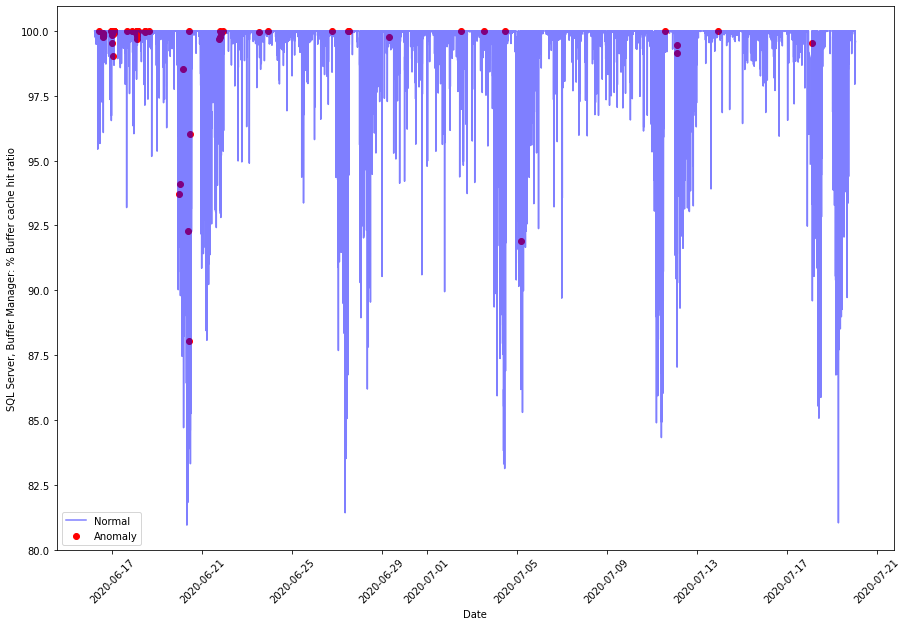

In [329]:
anomaly_plot('SQL Server, Buffer Manager: % Buffer cache hit ratio')

In [340]:
df_11

,Total disk space on K:,Total disk space on J:,Total disk space on N:\LOGS,Total disk space on N:,"SQL Server, Locks: Lock Waits per second (Total)","SQL Server, Buffer Manager: Page reads/sec",Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000,"SQL Server, Locks: Number of Deadlocks/sec (Total)",Free disk space on V:,Total disk space on Q:\LOGS,...,Total disk space on P:\LOGS,"SQL Server, Locks: Average Wait Time (Total)",Free disk space on R:\LOGS,Free disk space on G:,Free disk space on N:\LOGS,Free disk space on H:\LOGS,Free disk space on Q:,"SQL Server, Memory Manager: Memory Grants Pending",Free disk space on S:,"SQL Server, Cache: Cache Hit Ratio"
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-16 05:17:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1914432.0,0.0,1.661783e+10,5.365498e+09,...,1.073710e+11,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,81.8883
2020-06-16 05:18:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1760608.0,0.0,1.661783e+10,5.365498e+09,...,1.073710e+11,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,87.7246
2020-06-16 05:19:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1820848.0,0.0,1.661783e+10,5.365498e+09,...,1.073710e+11,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,81.2514
2020-06-16 05:20:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1720624.0,0.0,1.661783e+10,5.365498e+09,...,1.073710e+11,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,86.2335
2020-06-16 05:21:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,2609184.0,0.0,1.661783e+10,5.365498e+09,...,1.073710e+11,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,84.1061


## Plot Anomaly

***************************************************
SQL Server, Buffer Manager: Lazy writes/sec
***************************************************


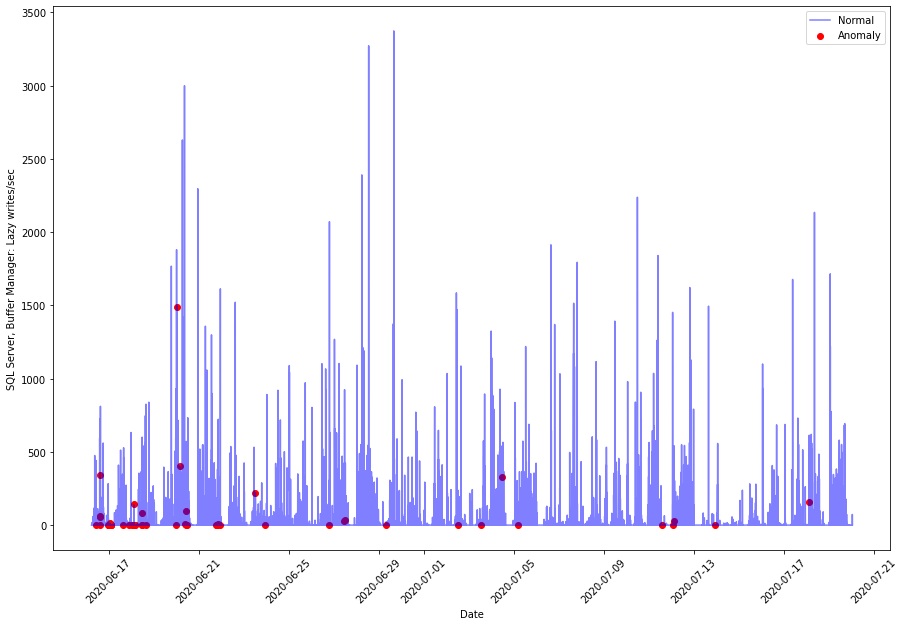



***************************************************
SQL Server, Buffer Manager: Read-ahead pages/sec
***************************************************


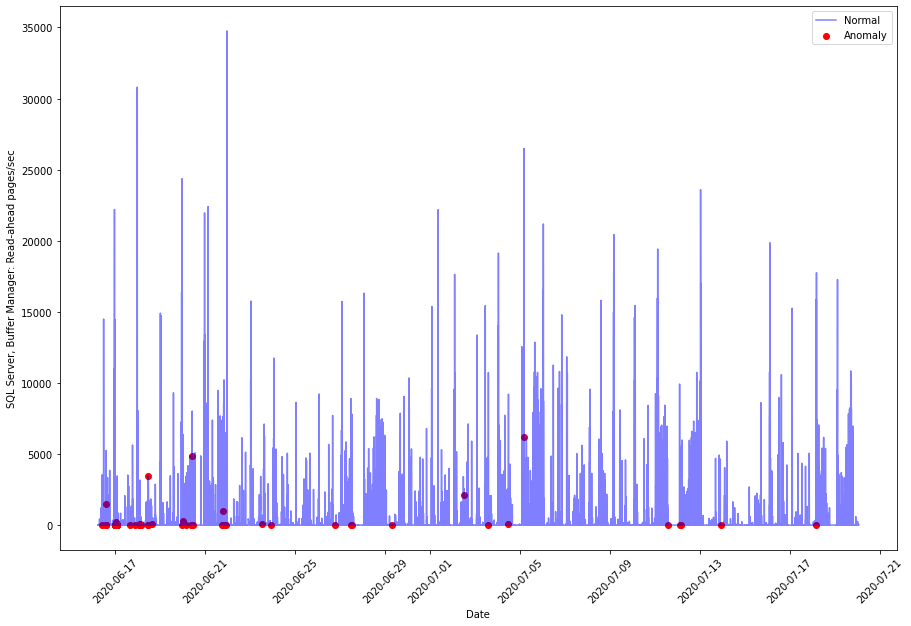



***************************************************
SQL Server, Buffer Manager: Target pages
***************************************************


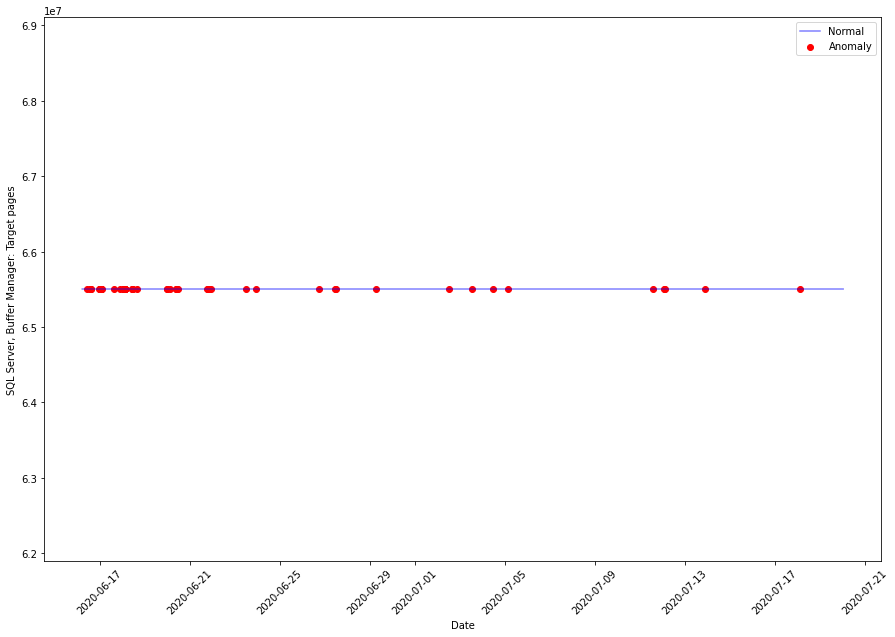



***************************************************
SQL Server, Buffer Manager: Database pages
***************************************************


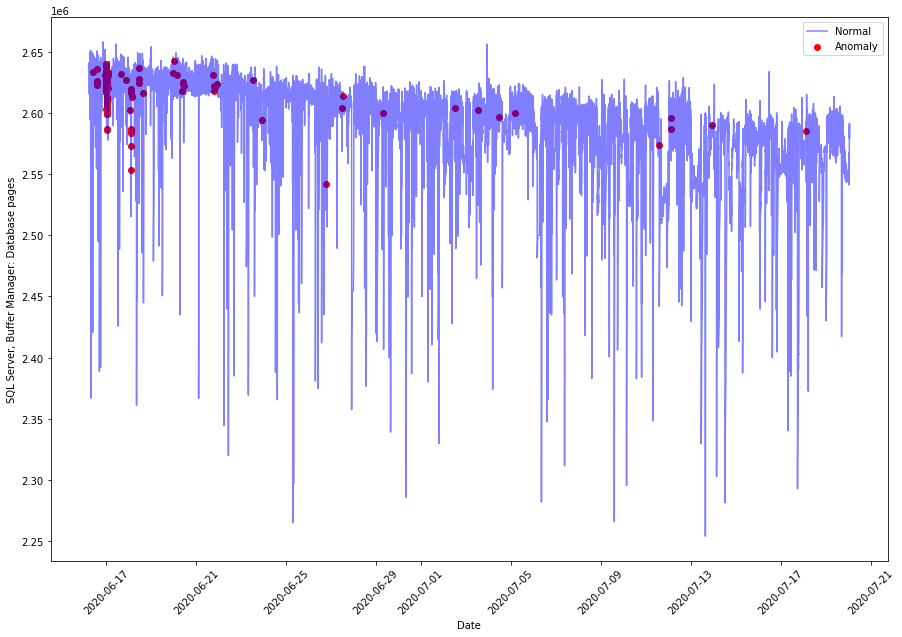



***************************************************
SQL Server, Buffer Manager: Page life expectancy(PLE)
***************************************************


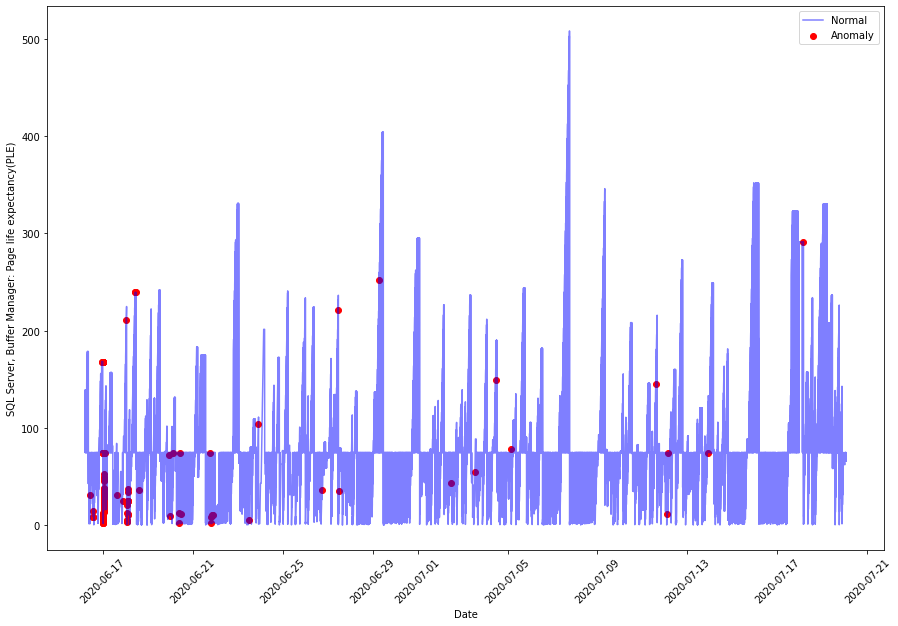



***************************************************
SQL Server, Buffer Manager: Checkpoint pages/sec
***************************************************


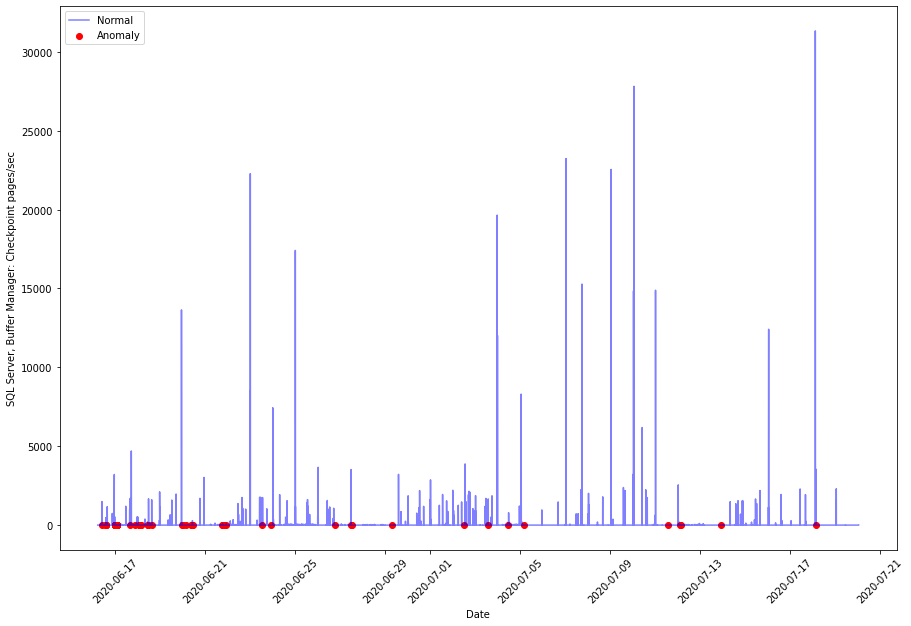



***************************************************
SQL Server, Buffer Manager: Page writes/sec
***************************************************


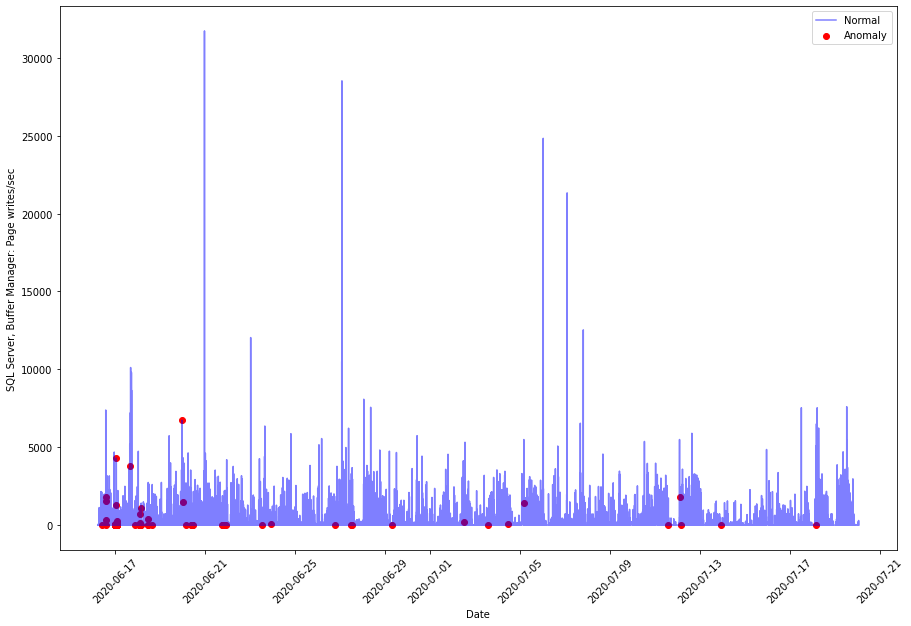



***************************************************
SQL Server, Buffer Manager: Page reads/sec
***************************************************


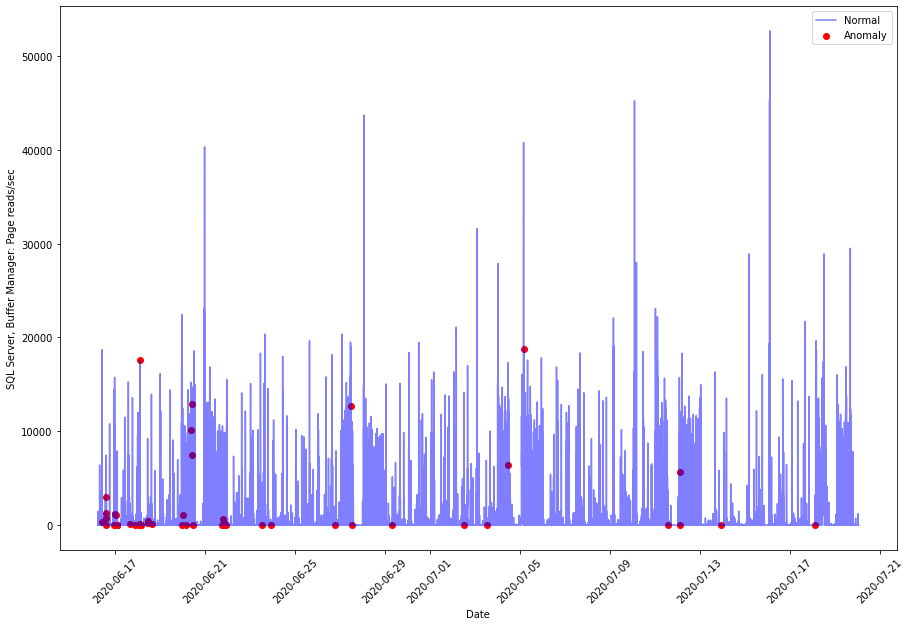



***************************************************
SQL Server, Buffer Manager: Free list stalls/sec
***************************************************


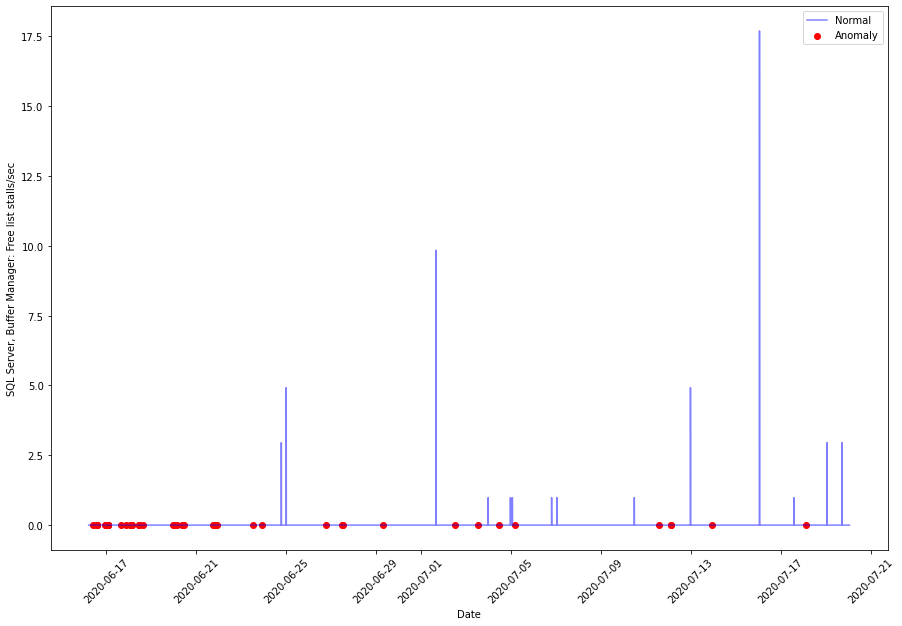



***************************************************
SQL Server, Buffer Manager: Page lookups/sec
***************************************************


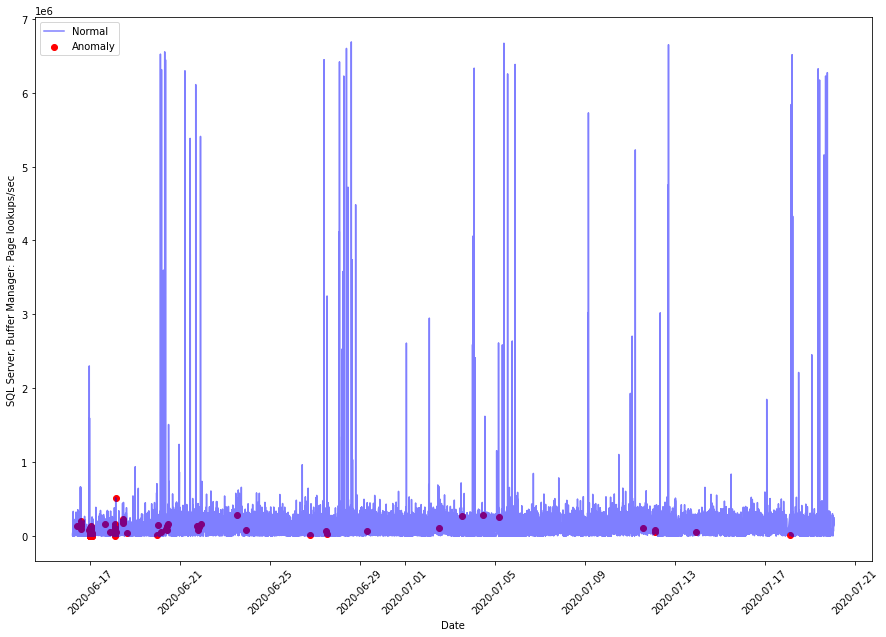



***************************************************
SQL Server, Buffer Manager: % Buffer cache hit ratio
***************************************************


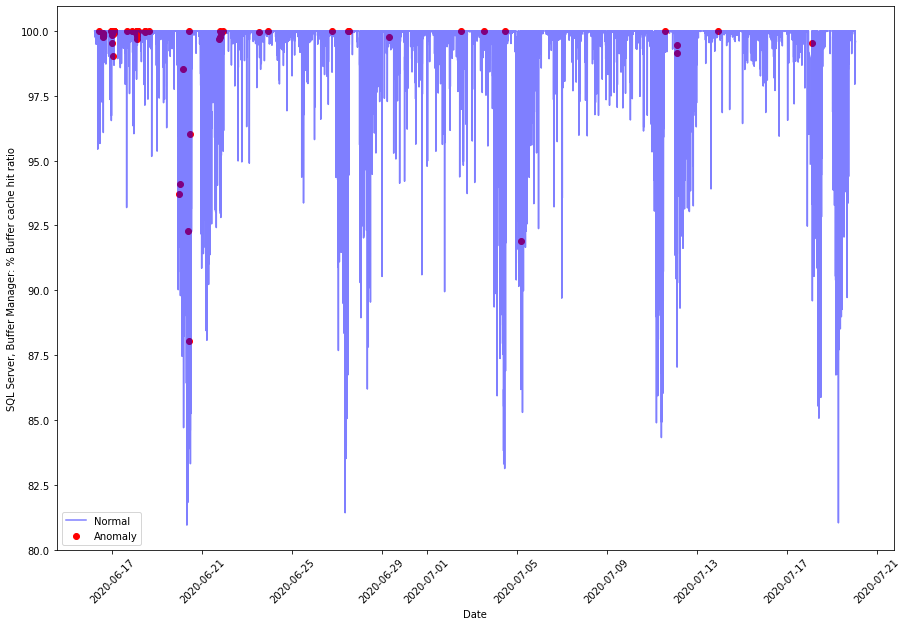

In [339]:
for col in buffer_col:
    print("*"*51)
    print(col)
    print("*"*51)
    anomaly_plot(col)
    print("\n")

In [375]:
list(df_11.columns)

['Total disk space on K:',
 'Total disk space on J:',
 'Total disk space on N:\\LOGS',
 'Total disk space on N:',
 'SQL Server, Locks: Lock Waits per second (Total)',
 'SQL Server, Buffer Manager: Page reads/sec',
 'Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000',
 'SQL Server, Locks: Number of Deadlocks/sec (Total)',
 'Free disk space on V:',
 'Total disk space on Q:\\LOGS',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'Free disk space on F:',
 'Free disk space on N:',
 'Total disk space on G:',
 'Processor load (5 min average)',
 'Incoming network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000',
 'Total disk space on I:\\LOGS',
 'SQL Server, Statistics: Failed Auto-Params/sec',
 'SQL Server, Buffer Manager: Database pages',
 'Total disk space on H:\\LOGS',
 'Free disk space on P:',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'Total disk space on F:',
 'SQL Server, Errors: Erro

# Univariate Anomaly

In [346]:
df_11.index

'Timestamp'

In [373]:

def isolation_forest_anomaly_detection(df, 
                                       column_name, 
                                       outliers_fraction):
    """
    In this definition, time series anomalies are detected using an Isolation Forest algorithm.
    Arguments:
        df: Pandas dataframe
        column_name: string. Name of the column that we want to detect anomalies in
        outliers_fraction: float. Percentage of outliers allowed in the sequence.
    Outputs:
        df: Pandas dataframe with column for detected Isolation Forest anomalies (True/False)
    """
    #Scale the column that we want to flag for anomalies
    std_scaler = StandardScaler()
    np_scaled = std_scaler.fit_transform(df[[column_name]])
    scaled_time_series = pd.DataFrame(np_scaled)
    
    # train isolation forest 
    model =  IsolationForest(contamination = outliers_fraction)
    model.fit(scaled_time_series)
    
    #Generate column for Isolation Forest-detected anomalies
    isolation_forest_anomaly_column = column_name+'_I_F_Anomaly'
    df[isolation_forest_anomaly_column] = model.predict(scaled_time_series)
    df[isolation_forest_anomaly_column] = df[isolation_forest_anomaly_column].map( {1: False, -1: True} )
    
#     return df

In [353]:
# buffer_col

In [356]:
# 10/df_11.shape[0]

In [378]:
u_df_11 = df_11.copy()

In [379]:
isolation_forest_anomaly_detection(u_df_11, 'SQL Server, Buffer Manager: Page life expectancy(PLE)',0.002 )

In [380]:
u_df_11['SQL Server, Buffer Manager: Page life expectancy(PLE)_I_F_Anomaly'].value_counts()

False    45179
True        91
Name: SQL Server, Buffer Manager: Page life expectancy(PLE)_I_F_Anomaly, dtype: int64

In [381]:
# anamoly_col = col_name + '_I_F_Anomaly'
# fig, ax = plt.subplots(figsize=(15,10))


# ax.plot(pd.to_datetime(u_df_11.index), u_df_11['SQL Server, Buffer Manager: % Buffer cache hit ratio'] , color='blue', label='Normal', alpha = 0.5)
# ax.scatter(pd.to_datetime(u_df_11.index), np.where(u_df_11['SQL Server, Buffer Manager: % Buffer cache hit ratio_I_F_Anomaly'] == True, df[col_name], None), color='red', label='Anomaly', alpha = 1)


# plt.xlabel('Date')
# plt.ylabel(col_name)
# plt.xticks(rotation = '45')
# plt.legend()
# plt.show();

In [371]:
def anomaly_plot_univariate(df,col_name):
    anamoly_col = col_name + '_I_F_Anomaly'
    fig, ax = plt.subplots(figsize=(15,10))


    ax.plot(pd.to_datetime(df.index), df[col_name] , color='blue', label='Normal', alpha = 0.5)
    ax.scatter(pd.to_datetime(df.index), np.where(df[anamoly_col] == True, df[col_name], None), color='red', label='Anomaly', alpha = 1)
    

    plt.xlabel('Date')
    plt.ylabel(col_name)
    plt.xticks(rotation = '45')
    plt.legend()
    plt.show();

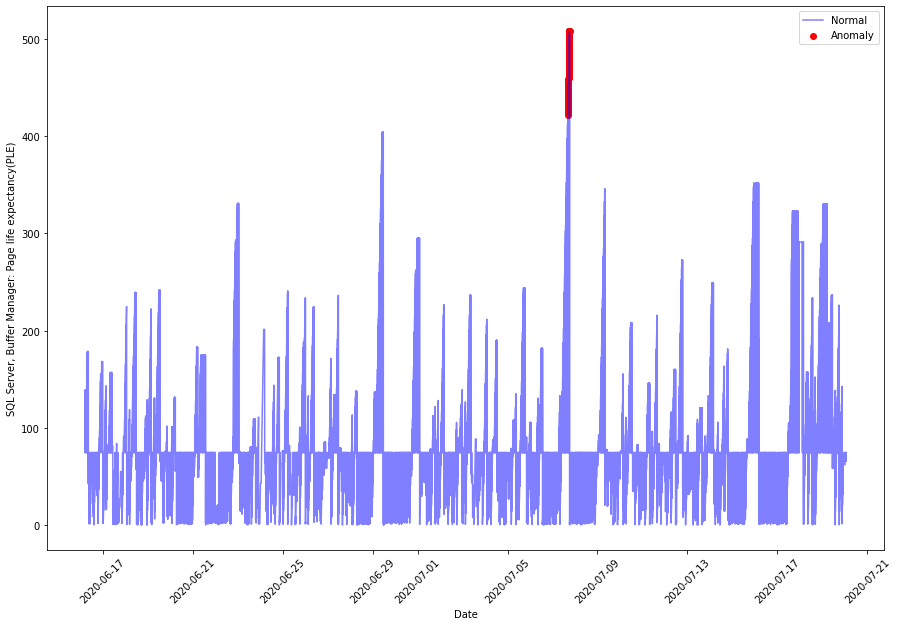

In [382]:
anomaly_plot_univariate(u_df_11, 'SQL Server, Buffer Manager: Page life expectancy(PLE)')

/home/ubuntu/anaconda3/envs/zabbix/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Timestamp'>

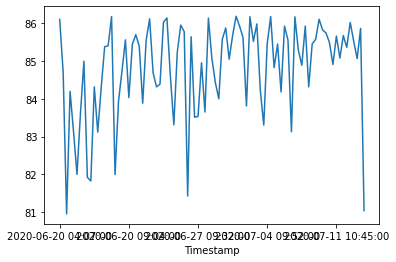

In [367]:
u_df_11[u_df_11['SQL Server, Buffer Manager: % Buffer cache hit ratio_I_F_Anomaly'] == True]['SQL Server, Buffer Manager: % Buffer cache hit ratio']

# Anomaly for only buffer col

In [413]:
data_11.shape

(45270, 136)

In [422]:
data_buffer = data_11[buffer_col]

In [423]:
data_buffer.index.name

'Date_Time'

In [424]:
scaler = StandardScaler()
data_buffer_scaled = scaler.fit_transform(data_buffer.values)

In [430]:
outliers_fraction = 0.001
model_buffer =  IsolationForest(contamination=outliers_fraction)
model_buffer.fit(data_buffer_scaled) 

IsolationForest(contamination=0.001)

In [431]:
data_buffer['Anomaly'] = pd.Series(model_buffer.predict(data_buffer_scaled), index = data_buffer.index)

<ipython-input-431-29020de3c0db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buffer['Anomaly'] = pd.Series(model_buffer.predict(data_buffer_scaled), index = data_buffer.index)


In [432]:
data_buffer['Anomaly'].value_counts()

 1    45224
-1       46
Name: Anomaly, dtype: int64

In [483]:
buffer_score = model_buffer.score_samples(data_buffer.iloc[:,:-1])

In [492]:
max(buffer_score)

-0.5664991607500071

#### Decison Function
```
scores : ndarray of shape (n_samples,)
    The anomaly score of the input samples.
    The lower, the more abnormal. Negative scores represent outliers,
    positive scores represent inliers.
```

In [489]:
buffer_decision_score = model_buffer.decision_function(data_buffer.iloc[:,:-1])

In [647]:
data_buffer.shape

(45270, 13)

In [655]:
# data_buffer_scaled[0:1,:].shape
model_buffer.decision_function(data_buffer_scaled[:,:]).min()

-0.08001883128350529

In [653]:
buffer_decision_score[0]

-0.020681696544112893

In [493]:
min(buffer_decision_score)

-0.1907599609790147

In [495]:
data_buffer['Decision_Score'] = pd.Series(buffer_decision_score, index = data_buffer.index)

<ipython-input-495-4daf649b7fb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buffer['Decision_Score'] = pd.Series(buffer_decision_score, index = data_buffer.index)


In [646]:
data_buffer[data_buffer['Anomaly'] == 1]['Decision_Score'].max()

0.09573912744640267

In [502]:
data_buffer[data_buffer['Anomaly'] == -1]['Decision_Score'].max()

-0.11241337741184021

## Plot General Def - 
- anomaly_plot_gen

In [590]:
def anomaly_plot_gen(df,col_name):
    #fig, ax = plt.subplots(figsize=(15,10))
    fig, ax = plt.subplots(figsize=(20,8))


    ax.plot(pd.to_datetime(df.index), df[col_name] , color='blue', label='Normal', alpha = 0.5)
    ax.scatter(pd.to_datetime(df.index), np.where(df['Anomaly'] == -1, df[col_name], None), color='red', label='Anomaly', alpha = 1)
    

    plt.xlabel('Date')
    plt.ylabel(col_name)
    plt.xticks(rotation = '45')
    plt.legend()
    plt.show();

In [452]:
# for col in buffer_col:
#     anomaly_plot_gen(data_buffer, col)

	 All Data


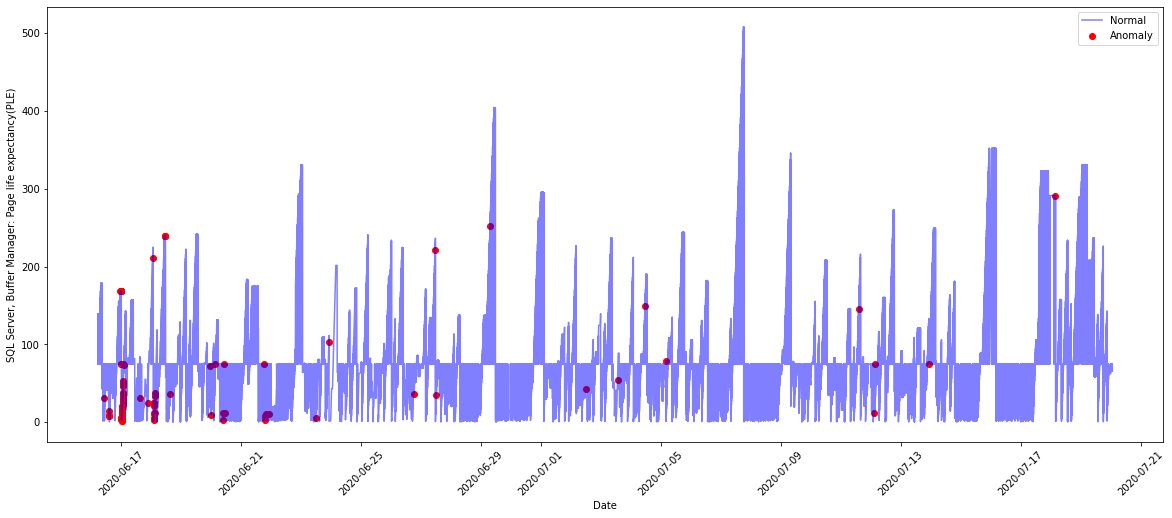

In [591]:
print('\t','All Data')
anomaly_plot_gen(data_11,'SQL Server, Buffer Manager: Page life expectancy(PLE)')

	 Buffer Data


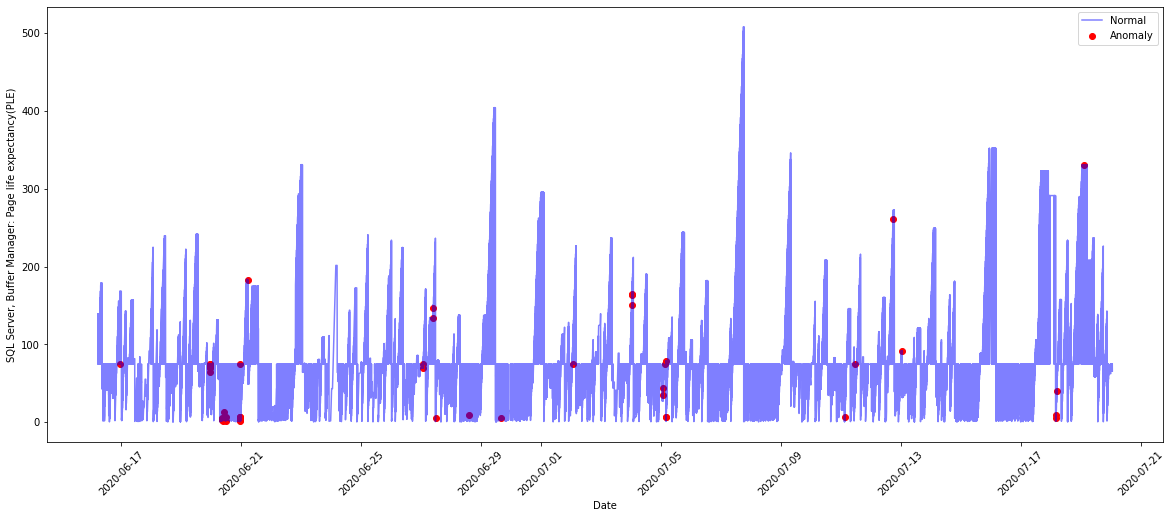

In [593]:
print('\t','Buffer Data')
anomaly_plot_gen(data_buffer,'SQL Server, Buffer Manager: Page life expectancy(PLE)')

## Looking into Anamoly - Data

In [460]:
# Buffer Anomaly on 2020
data_buffer[(data_buffer.index > '2020-07-04 00:00:00') & (data_buffer.index < '2020-07-05 00:00:00') & (data_buffer.Anomaly == -1)]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio",Anomaly
Date_Time,,,,,,,,,,,,
2020-07-04 00:32:00,655.7418,7368.8195,65503232.0,2628744.0,151.1136,0.0,774.6527,1729.9863,0.0,44688.6593,100.0000,-1
2020-07-04 00:46:00,36.3995,13705.5914,65503232.0,2611430.0,162.7992,0.0,0.0000,13840.9623,0.0,41267.3993,94.4709,-1
2020-07-04 00:50:00,123.0780,19129.9795,65503232.0,2597663.0,165.2330,0.0,743.4017,33.4776,0.0,261750.1393,92.0710,-1


In [479]:
# print(data_11[data_11.Anomaly == -1]['Free disk space on L:'].describe())
anomaly_stats(data_11, 'Free disk space on L:')
# Buffer Anomaly on 2020
data_11[(data_11.index > '2020-07-03 00:00:00') & (data_11.index < '2020-07-04 00:00:00') & (data_11.Anomaly == -1)]['Free disk space on L:']

-------------------------------------------------------------
**********
Overall Description
**********
count    4.527000e+04
mean     9.417029e+09
std      3.067312e+09
min      3.248947e+09
25%      8.543207e+09
50%      8.861975e+09
75%      1.227090e+10
max      1.398637e+10
Name: Free disk space on L:, dtype: float64


-------------------------------------------------------------
**********
Anomaly Description
**********
count    1.490000e+02
mean     1.147488e+10
std      1.603392e+09
min      3.248947e+09
25%      1.186405e+10
50%      1.186405e+10
75%      1.186405e+10
max      1.295247e+10
Name: Free disk space on L:, dtype: float64


-------------------------------------------------------------
**********
Normal Description
**********
count    4.512100e+04
mean     9.410233e+09
std      3.068714e+09
min      3.248947e+09
25%      8.543207e+09
50%      8.861975e+09
75%      1.227090e+10
max      1.398637e+10
Name: Free disk space on L:, dtype: float64


Date_Time
2020-07-03 13:12:00    8.636531e+09
Name: Free disk space on L:, dtype: float64

In [459]:
anomaly_stats(data_buffer, buffer_col[-1])

-------------------------------------------------------------
**********
Overall Description
**********
count    45270.000000
mean        99.590418
std          1.554089
min         80.946800
25%         99.976100
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64


-------------------------------------------------------------
**********
Anomaly Description
**********
count     46.000000
mean      95.441265
std        5.172308
min       83.931900
25%       91.935550
50%       97.650400
75%       99.966200
max      100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64


-------------------------------------------------------------
**********
Normal Description
**********
count    45224.000000
mean        99.594638
std          1.540616
min         80.946800
25%         99.976375
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffe

In [507]:
anomaly_stats(data_11, 'SQL Server, Buffer Manager: Page life expectancy(PLE)')

-------------------------------------------------------------
**********
Overall Description
**********
count    45270.000000
mean        74.637672
std         77.330437
min          0.000000
25%         17.703500
50%         58.145000
75%         86.813225
max        508.368300
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64


-------------------------------------------------------------
**********
Anomaly Description
**********
count    149.000000
mean      52.323336
std       66.581322
min        1.717000
25%        6.651300
50%       24.738300
75%       74.637672
max      291.191600
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64


-------------------------------------------------------------
**********
Normal Description
**********
count    45121.000000
mean        74.711359
std         77.353432
min          0.000000
25%         17.803600
50%         58.328300
75%         86.984100
max        508.368300
Name: SQL Server, Buf

In [583]:
# data_buffer.head()
data_buffer[data_buffer.Anomaly == -1]['SQL Server, Buffer Manager: Page reads/sec'].describe()

count       46.000000
mean      9635.822509
std       6669.594465
min          0.000000
25%       3526.152650
50%      10509.327750
75%      14108.802850
max      23079.690400
Name: SQL Server, Buffer Manager: Page reads/sec, dtype: float64

In [584]:
anomaly_stats(data_buffer,'SQL Server, Buffer Manager: Page reads/sec')

-------------------------------------------------------------
**********
Overall Description
**********
count    45270.000000
mean       617.936692
std       2081.949758
min          0.000000
25%          0.000000
50%          0.000000
75%         55.134675
max      52664.572500
Name: SQL Server, Buffer Manager: Page reads/sec, dtype: float64


-------------------------------------------------------------
**********
Anomaly Description
**********
count       46.000000
mean      9635.822509
std       6669.594465
min          0.000000
25%       3526.152650
50%      10509.327750
75%      14108.802850
max      23079.690400
Name: SQL Server, Buffer Manager: Page reads/sec, dtype: float64


-------------------------------------------------------------
**********
Normal Description
**********
count    45224.000000
mean       608.764068
std       2052.280683
min          0.000000
25%          0.000000
50%          0.000000
75%         54.154025
max      52664.572500
Name: SQL Server, Buffer Ma

In [446]:
data_11.shape

(45270, 136)

In [505]:
# data_11['SQL Server, Buffer Manager: Lazy writes/sec'].mean()
data_11['SQL Server, Buffer Manager: Page life expectancy(PLE)'].mean()

74.63767237653127

In [508]:
data_11[(data_11.index > '2020-06-20 00:00:00') & (data_11.index < '2020-06-21 00:00:00') & (data_11.Anomaly == -1)]\
['SQL Server, Buffer Manager: % Buffer cache hit ratio'].mean()
#['SQL Server, Buffer Manager: Page life expectancy(PLE)'].mean()

94.83228333333334

In [ ]:
data_11[(data_11.index > '2020-06-20 00:00:00') & (data_11.index < '2020-06-21 00:00:00') & (data_11.Anomaly == 1)]

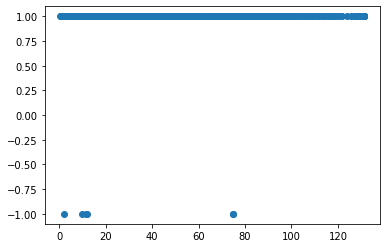

In [515]:
plt.scatter(data_11[(data_11.index > '2020-06-20 00:00:00') & (data_11.index < '2020-06-21 00:00:00')]['SQL Server, Buffer Manager: Page life expectancy(PLE)'],data_11[(data_11.index > '2020-06-20 00:00:00') & (data_11.index < '2020-06-21 00:00:00')]['Anomaly'])

In [448]:
data_11[(data_11.index > '2020-06-20 00:00:00') & (data_11.index < '2020-06-21 00:00:00') & (data_11.Anomaly == -1)][buffer_col]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio"
Date_Time,,,,,,,,,,,
2020-06-20 00:12:00,1491.6838,303.2603,65503232.0,2642649.0,9.651900,0.0,1476.8662,1040.6580,0.0,148494.5635,94.1072
2020-06-20 03:12:00,403.6869,0.0000,65503232.0,2631457.0,74.637672,0.0,0.0000,0.0000,0.0,59637.1384,98.5279
2020-06-20 09:12:00,6.8921,26.5843,65503232.0,2617932.0,2.033700,0.0,6.8923,10092.5009,0.0,98135.6017,92.2772
2020-06-20 09:47:00,96.4850,4845.3075,65503232.0,2625620.0,12.085800,0.0,7.8767,12929.9772,0.0,141931.3481,100.0000
2020-06-20 10:12:00,0.9846,0.9846,65503232.0,2623967.0,74.637672,0.0,23.6280,7445.2181,0.0,83014.4716,88.0436
2020-06-20 11:12:00,0.0000,6.8923,65503232.0,2622383.0,11.552300,0.0,0.0000,0.0000,0.0,160661.8359,96.0378


In [451]:
data_buffer[(data_buffer.index > '2020-06-20 00:00:00') & (data_buffer.index < '2020-06-21 00:00:00') & (data_buffer.Anomaly == -1)]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio",Anomaly
Date_Time,,,,,,,,,,,,
2020-06-20 08:29:00,804.4374,3.9385,65503232.0,2620589.0,3.600700,0.0,1521.2336,3670.6283,0.0,80743.3312,91.0639,-1
2020-06-20 08:46:00,132.9206,41.3298,65503232.0,2625699.0,2.117100,0.0,1722.0955,9679.8087,0.0,172360.0682,84.3192,-1
2020-06-20 08:57:00,533.6740,14.7686,65503232.0,2618469.0,4.567600,0.0,1014.1506,14853.9419,0.0,53340.6918,83.9319,-1
2020-06-20 09:30:00,292.4745,54.1529,65503232.0,2618986.0,1.700300,0.0,1421.7484,8183.1711,0.0,109808.6299,91.0130,-1
2020-06-20 10:06:00,11.8152,8021.7121,65503232.0,2629224.0,12.602500,0.0,12.7996,14669.0994,0.0,108063.2193,86.0346,-1
2020-06-20 11:59:00,654.7495,0.0000,65503232.0,2623084.0,1.750400,0.0,99.4317,0.0000,0.0,513899.5653,89.1795,-1
2020-06-20 12:10:00,0.0000,4678.9366,65503232.0,2626231.0,6.167900,0.0,140.8103,10046.5615,0.0,298813.7303,91.1139,-1
2020-06-20 22:50:00,1128.3072,14.7696,65503232.0,2627100.0,1.533600,0.0,2712.7176,19244.8139,0.0,425295.4796,99.9478,-1
2020-06-20 23:04:00,59.0716,1943.5681,65503232.0,2627080.0,3.100600,0.0,1352.8857,23079.6904,0.0,389656.8595,92.1645,-1


In [521]:
data_buffer[(data_buffer.index > '2020-06-20 00:00:00') & (data_buffer.index < '2020-06-21 00:00:00') & (data_buffer.Anomaly == 1) \
             & (data_buffer['SQL Server, Buffer Manager: Page life expectancy(PLE)'] > 100)]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio",Anomaly,Decision_Score
Date_Time,,,,,,,,,,,,,
2020-06-20 02:00:00,8.8593,2264.5720,65503232.0,2618070.0,100.4701,0.0,0.0000,305.2324,0.0,20569.9044,100.0000,1,-0.134742
2020-06-20 02:01:00,9.8463,0.0000,65503232.0,2632954.0,101.3869,0.0,0.0000,3746.3566,0.0,12661.3423,99.8083,1,-0.091983
2020-06-20 02:03:00,93.5155,70.8927,65503232.0,2632184.0,101.3869,0.0,0.0000,4898.4687,0.0,27099.3431,96.0937,1,-0.139068
2020-06-20 04:00:00,28.5532,194.9631,65503232.0,2623902.0,100.4368,0.0,0.0000,2235.2177,0.0,52343.7808,100.0000,1,-0.136902
2020-06-20 04:01:00,42.3385,0.0000,65503232.0,2622007.0,101.4370,0.0,0.0000,1049.7366,0.0,39586.3895,100.0000,1,-0.098131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-20 05:31:00,0.0000,4175.7793,65503232.0,2626574.0,131.3763,0.0,0.0000,8371.4414,0.0,47949.0874,100.0000,1,-0.112413
2020-06-20 05:33:00,0.0000,17.7228,65503232.0,2626167.0,131.3763,0.0,817.2196,3262.0822,0.0,107868.0301,100.0000,1,-0.154612
2020-06-20 05:34:00,0.0000,1747.3226,65503232.0,2624951.0,131.3763,0.0,63.9969,2227.7132,0.0,70718.9996,99.4670,1,-0.154612


In [551]:
buffer_col[-1]

'SQL Server, Buffer Manager: % Buffer cache hit ratio'

In [555]:
# Looking buffer cache when anomaly is there on 2020-06-20
data_buffer[(data_buffer.index > '2020-06-20 00:00:00') & (data_buffer.index < '2020-06-21 00:00:00') & (data_buffer.Anomaly == -1) \
             & (data_buffer['SQL Server, Buffer Manager: % Buffer cache hit ratio'] > 90)] # SQL Server, Buffer Manager: Page life expectancy(PLE)

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio",Anomaly,Decision_Score
Date_Time,,,,,,,,,,,,,
2020-06-20 08:29:00,804.4374,3.9385,65503232.0,2620589.0,3.600700,0.0,1521.2336,3670.6283,0.0,80743.3312,91.0639,-1,-0.156272
2020-06-20 09:30:00,292.4745,54.1529,65503232.0,2618986.0,1.700300,0.0,1421.7484,8183.1711,0.0,109808.6299,91.0130,-1,-0.165181
2020-06-20 12:10:00,0.0000,4678.9366,65503232.0,2626231.0,6.167900,0.0,140.8103,10046.5615,0.0,298813.7303,91.1139,-1,-0.154612
2020-06-20 22:50:00,1128.3072,14.7696,65503232.0,2627100.0,1.533600,0.0,2712.7176,19244.8139,0.0,425295.4796,99.9478,-1,-0.164621
2020-06-20 23:04:00,59.0716,1943.5681,65503232.0,2627080.0,3.100600,0.0,1352.8857,23079.6904,0.0,389656.8595,92.1645,-1,-0.167984
2020-06-20 23:10:00,116.1828,0.0000,65503232.0,2628068.0,5.967900,0.0,31722.9740,13003.8618,0.0,288777.8085,99.9611,-1,-0.143520
2020-06-20 23:13:00,17.7239,10834.5928,65503232.0,2637776.0,74.637672,0.0,41.3512,20849.5057,0.0,729733.3567,97.4171,-1,-0.169109
2020-06-20 23:14:00,5.9078,19216.3862,65503232.0,2615979.0,5.967900,0.0,635.0690,395.7005,0.0,866689.5175,97.8837,-1,-0.165181
2020-06-20 23:16:00,29.5385,21957.3620,65503232.0,2621202.0,7.118100,0.0,2284.3437,1772.3521,0.0,0.0000,96.4422,-1,-0.146364


In [557]:
# Looking buffer cache when anomaly is there on 2020-06-20
data_11[(data_11.index > '2020-06-20 00:00:00') & (data_11.index < '2020-06-21 00:00:00') & (data_11.Anomaly == -1) \
             & (data_11['SQL Server, Buffer Manager: % Buffer cache hit ratio'] > 90)]['SQL Server, Buffer Manager: % Buffer cache hit ratio'] # SQL Server, Buffer Manager: Page life expectancy(PLE)

Date_Time
2020-06-20 00:12:00     94.1072
2020-06-20 03:12:00     98.5279
2020-06-20 09:12:00     92.2772
2020-06-20 09:47:00    100.0000
2020-06-20 11:12:00     96.0378
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64

In [572]:
# Looking buffer cache when anomaly is there on 2020-06-20
data_11[(data_11.index > '2020-06-20 00:00:00') & (data_11.index < '2020-06-21 00:00:00') & (data_11.Anomaly == -1)][['SQL Server, Buffer Manager: % Buffer cache hit ratio']]
#         & ( data_11['SQL Server, Buffer Manager: % Buffer cache hit ratio'] == data_11['SQL Server, Buffer Manager: % Buffer cache hit ratio'].min())] # SQL Server, Buffer Manager: Page life expectancy(PLE)

,"SQL Server, Buffer Manager: % Buffer cache hit ratio"
Date_Time,
2020-06-20 00:12:00,94.1072
2020-06-20 03:12:00,98.5279
2020-06-20 09:12:00,92.2772
2020-06-20 09:47:00,100.0000
2020-06-20 10:12:00,88.0436
2020-06-20 11:12:00,96.0378


In [575]:
# Looking anomaly day 2020-06-20
# Looking buffer cache when anomaly is there on 2020-06-20
data_11[(data_11.index > '2020-06-20 00:00:00') & (data_11.index < '2020-06-21 00:00:00') & (data_11.Anomaly == -1)][['SQL Server, Buffer Manager: Page life expectancy(PLE)','SQL Server, Buffer Manager: Page reads/sec' ]]
#         & ( data_11['SQL Server, Buffer Manager: % Buffer cache hit ratio'] == data_11['SQL Server, Buffer Manager: % Buffer cache hit ratio'].min())] # SQL Server, Buffer Manager: Page life expectancy(PLE)

,"SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Page reads/sec"
Date_Time,,
2020-06-20 00:12:00,9.651900,1040.6580
2020-06-20 03:12:00,74.637672,0.0000
2020-06-20 09:12:00,2.033700,10092.5009
2020-06-20 09:47:00,12.085800,12929.9772
2020-06-20 10:12:00,74.637672,7445.2181
2020-06-20 11:12:00,11.552300,0.0000


In [574]:
buffer_col


['SQL Server, Buffer Manager: Lazy writes/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Buffer Manager: Target pages',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'SQL Server, Buffer Manager: Page writes/sec',
 'SQL Server, Buffer Manager: Page reads/sec',
 'SQL Server, Buffer Manager: Free list stalls/sec',
 'SQL Server, Buffer Manager: Page lookups/sec',
 'SQL Server, Buffer Manager: % Buffer cache hit ratio']

In [573]:
# Looking buffer cache when anomaly is there on 2020-07-04
data_11[(data_11.index > '2020-07-04 00:00:00') & (data_11.index < '2020-07-05 00:00:00') & (data_11.Anomaly == -1)][['SQL Server, Buffer Manager: % Buffer cache hit ratio']]

,"SQL Server, Buffer Manager: % Buffer cache hit ratio"
Date_Time,
2020-07-04 11:12:00,99.9987


In [595]:
[x for x in disk_space_col if 'L:' in x ]

['Free disk space on L:\\LOGS',
 'Total disk space on L:',
 'Total disk space on L:\\LOGS',
 'Free disk space on L:']

In [596]:
# 2020-07-03 21:36:00

# Looking buffer cache when anomaly is there on 2020-07-04
data_11[(data_11.index > '2020-07-03 00:00:00') & (data_11.index < '2020-07-05 00:00:00') & (data_11.Anomaly == -1)]\
[['SQL Server, Buffer Manager: % Buffer cache hit ratio','Free disk space on L:']]

,"SQL Server, Buffer Manager: % Buffer cache hit ratio",Free disk space on L:
Date_Time,,
2020-07-03 13:12:00,99.9987,8.636531e+09
2020-07-04 11:12:00,99.9987,8.588296e+09


In [597]:
anomaly_stats(data_11, 'Free disk space on L:')

-------------------------------------------------------------
**********
Overall Description
**********
count    4.527000e+04
mean     9.417029e+09
std      3.067312e+09
min      3.248947e+09
25%      8.543207e+09
50%      8.861975e+09
75%      1.227090e+10
max      1.398637e+10
Name: Free disk space on L:, dtype: float64


-------------------------------------------------------------
**********
Anomaly Description
**********
count    1.490000e+02
mean     1.147488e+10
std      1.603392e+09
min      3.248947e+09
25%      1.186405e+10
50%      1.186405e+10
75%      1.186405e+10
max      1.295247e+10
Name: Free disk space on L:, dtype: float64


-------------------------------------------------------------
**********
Normal Description
**********
count    4.512100e+04
mean     9.410233e+09
std      3.068714e+09
min      3.248947e+09
25%      8.543207e+09
50%      8.861975e+09
75%      1.227090e+10
max      1.398637e+10
Name: Free disk space on L:, dtype: float64


In [607]:
# 2020-06-16 

data_11[(data_11.index > '2020-06-17 00:00:00') & (data_11.index < '2020-06-18 00:00:00') & (data_11.Anomaly == -1)][buffer_col]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio"
"SQL Server, Buffer Manager: Lazy writes/sec",1.000000,-0.015260,NaN,0.077981,-0.003791,-0.012353,-0.020910,-0.013913,NaN,0.113796,0.019080
"SQL Server, Buffer Manager: Read-ahead pages/sec",-0.015260,1.000000,NaN,0.120836,0.142050,-0.014199,-0.017739,-0.015993,NaN,-0.061846,0.004068
"SQL Server, Buffer Manager: Target pages",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"SQL Server, Buffer Manager: Database pages",0.077981,0.120836,NaN,1.000000,0.320007,-0.128324,0.156285,0.090564,NaN,0.203463,0.091935
"SQL Server, Buffer Manager: Page life expectancy(PLE)",-0.003791,0.142050,NaN,0.320007,1.000000,-0.067934,-0.025043,-0.009462,NaN,-0.112213,0.046740
"SQL Server, Buffer Manager: Checkpoint pages/sec",-0.012353,-0.014199,NaN,-0.128324,-0.067934,1.000000,-0.019457,-0.012946,NaN,-0.066228,0.017754
"SQL Server, Buffer Manager: Page writes/sec",-0.020910,-0.017739,NaN,0.156285,-0.025043,-0.019457,1.000000,0.035421,NaN,0.229550,0.024437
"SQL Server, Buffer Manager: Page reads/sec",-0.013913,-0.015993,NaN,0.090564,-0.009462,-0.012946,0.035421,1.000000,NaN,-0.034275,0.019452
"SQL Server, Buffer Manager: Free list stalls/sec",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"SQL Server, Buffer Manager: Page lookups/sec",0.113796,-0.061846,NaN,0.203463,-0.112213,-0.066228,0.229550,-0.034275,NaN,1.000000,-0.069333


In [613]:
# buffer_col + disk_space_col + traffic_col

In [616]:
!pwd

/home/ubuntu/Zabbix/Script/Model


# Correlation Analysis - Anomaly vs Normal

In [697]:
# Utility function for Correlation
# spearman
def get_feature_correlation(df, top_n=None, corr_method='pearson',
                            remove_duplicates=True, remove_self_correlations=True):

    corr_matrix_abs = df.corr(method=corr_method).abs()
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_correlated_features = corr_matrix_abs_us \
        .sort_values(kind="quicksort", ascending=False) \
        .reset_index()

    # Remove comparisons of the same feature
    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]

    # Create meaningful names for the columns
    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation (abs)']

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features

# Correlation Function

def correlation_analysis(df):
#     processed_data_path = '/home/ubuntu/Zabbix/Data/SRV_Data/SRV_Processed/' + str(server_name).replace(":","") + "_Processed" + '.csv'
    
#     result_path = '/home/ubuntu/Zabbix/Data/SRV_Data/SRV_CORR_ANALYSIS/FEATURES/Pearson/'
    
#     # Read data
#     df = pd.read_csv(processed_data_path)
    result_path = '/home/ubuntu/Zabbix/Data/MODEL_DATA/SRV_FR_SQLN_11/FEATURES/'
    server_name = 'SRV_FR_SQLN_11'
    
    # Check for folder and creating 
    MYDIR = result_path + server_name.replace(":","_")
    CHECK_FOLDER = os.path.isdir(MYDIR)

    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        
    ############################### FOLDER ################################################    
    # write df description
    describe_path = MYDIR + "//" +  server_name.replace(":","_") + "_" + "Data_Description.xlsx"
    df.describe().to_excel(describe_path)

    # Missing Value Treatment
#     df = df.set_index('Timestamp').fillna(df.mean())
    
    ############################### Features ##############################################
    # Selecting Features from correlation matrix

    corr_out_df = get_feature_correlation(df)

    # Saving Correlation Matrix
    corr_path = MYDIR + "//" + server_name.replace(":","_") + "_Correlation_Matrix_All.xlsx"
    corr_out_df.to_excel(corr_path, index = False)
    
    
    ############################# Filtering High Correlation Columns ######################
    # Filtering only columns which are showing 50% or more correlation in cor_out_df
    feat_df = corr_out_df[corr_out_df['Correlation (abs)'] >= 0.5]

    # list_of_feat1 
    list_out_feat1 = feat_df['Feature 1'].values

    # list_of_feat2
    list_out_feat2 = feat_df['Feature 2'].values
    
    features_col = []
    for feat in list_out_feat1:
        features_col.append(feat)

    for feat in list_out_feat2:
        features_col.append(feat)
    
    features_col = list(set(features_col))
    
    # Writitng Selected Features to Excel File
    feature_path = MYDIR + "//" + server_name.replace(":","_") + "_FeaturesList_High_Correlation.xlsx"
    
    feat_list_df = pd.DataFrame(data = features_col, columns = ['Feature Name'])
    feat_list_df.to_excel(feature_path, index = False)
    
    
    # Subsetting df for only selected columns
    df = df[features_col]
    subset_corr_out_df = get_feature_correlation(df)
    
    # Saving Subset/ Selected Features Correlation Matrix
    subset_corr_path = MYDIR + "//" + server_name.replace(":","_") + "_Correlation_Matrix_Selected_Features.xlsx"
    subset_corr_out_df.to_excel(subset_corr_path, index = False)
    #print("#### Processed High Correlation Features ####")
    
    ############################# Plot ###################################################
    
    # Plot correlation matrix:
    plot_path = MYDIR +"//" + server_name.replace(":","_") + "_Correlation_Plot.svg"
    plt_x_size = 20
    plt_y_size = 15

    if df.shape[1] > 30:
        plt_x_size = 120
        plt_y_size = 80

    df_corr = df.corr(method='pearson').apply(lambda x: round(x,2)) #pearson spearman
    plt.figure(figsize=(plt_x_size, plt_y_size))
    sns.heatmap(df_corr,\
                    annot=True,\
                    cmap=sns.diverging_palette(20, 220, n=200),
                    vmin=-1,\
                    vmax=1, \
                    square=True, 
                    linewidths=0.1,\
                    annot_kws={"size":8}) 

    plt.savefig(plot_path, format = 'svg', dpi=300)
    
    print("#### Done ####")
    
    
    
    
    
    
    
    

In [624]:
df_11_2020_06_17_Anomaly = data_11[(data_11.index > '2020-06-17 00:00:00') & (data_11.index < '2020-06-18 00:00:00') & (data_11.Anomaly == -1)][buffer_col + disk_space_col + traffic_col]

df_11_2020_06_17_Normal = data_11[(data_11.index > '2020-06-17 00:00:00') & (data_11.index < '2020-06-18 00:00:00') & (data_11.Anomaly == 1)][buffer_col + disk_space_col + traffic_col]

#### Done ####


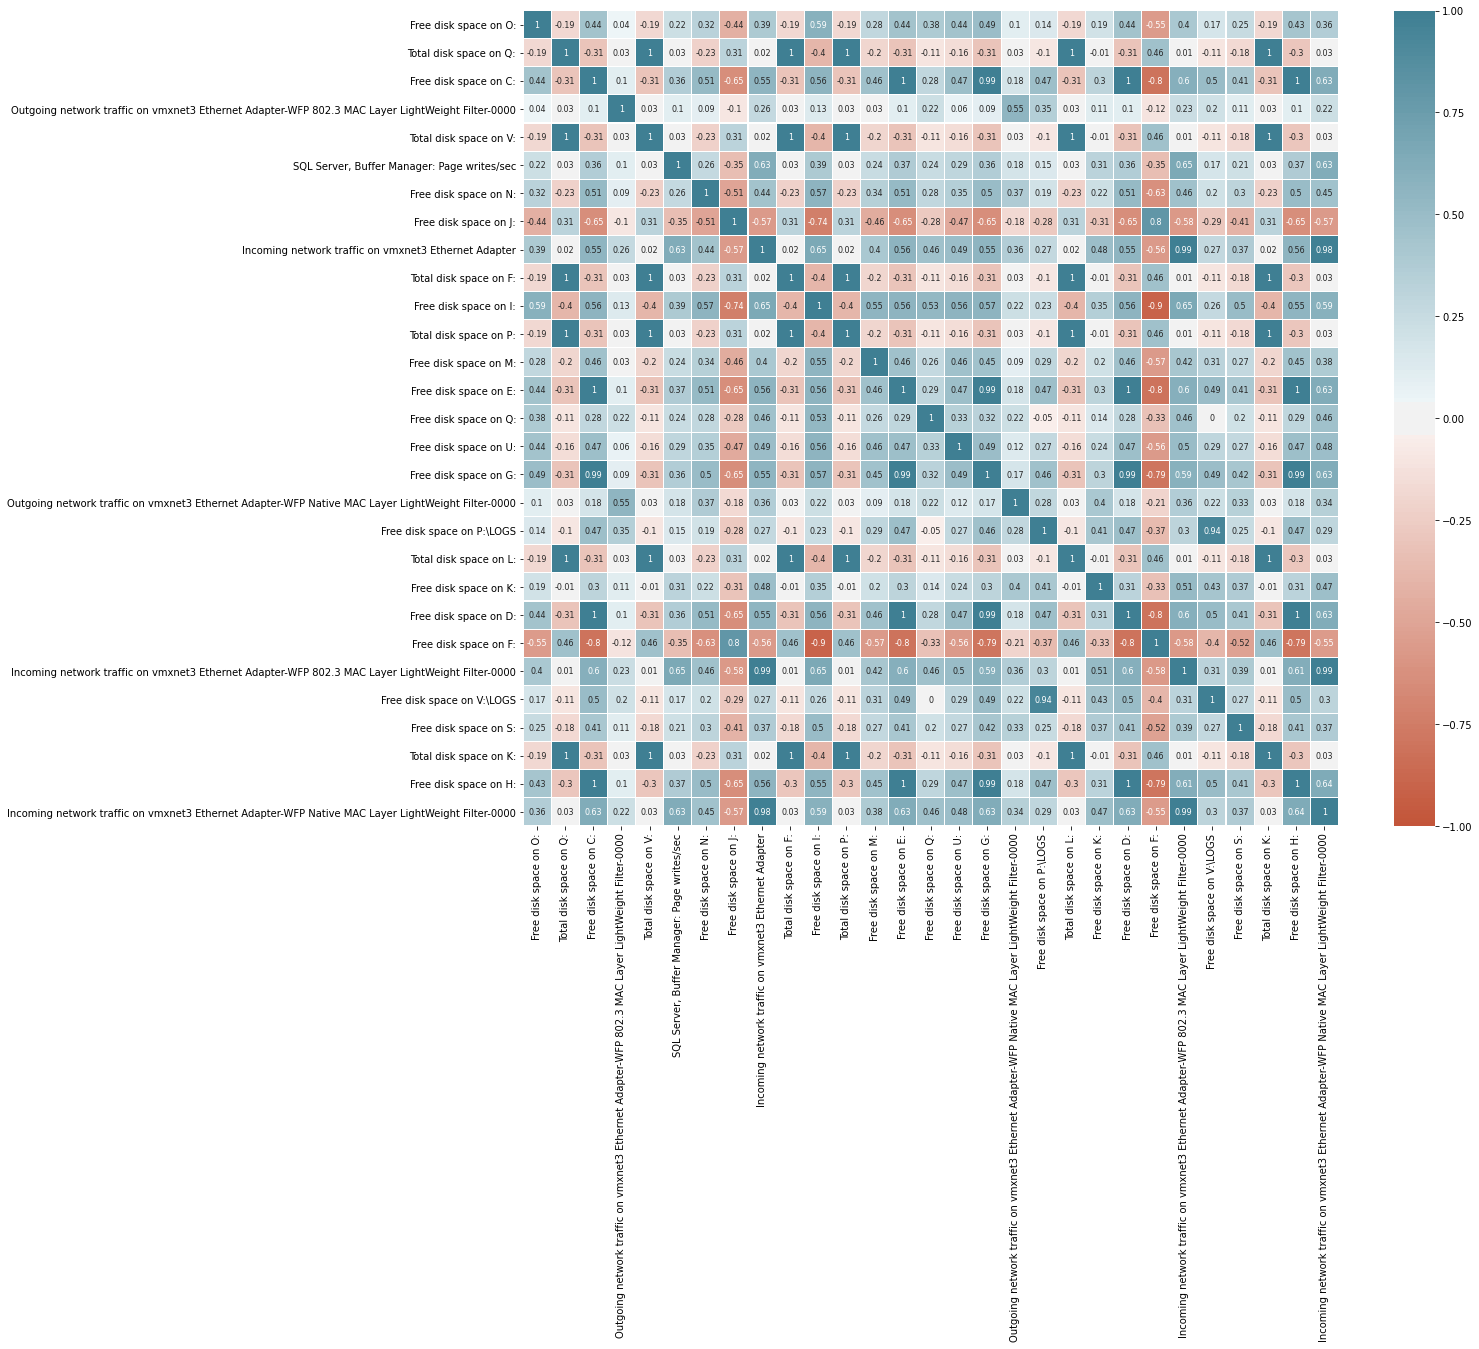

In [629]:
# correlation_analysis(df_11_2020_06_17_Anomaly)

#### Done ####


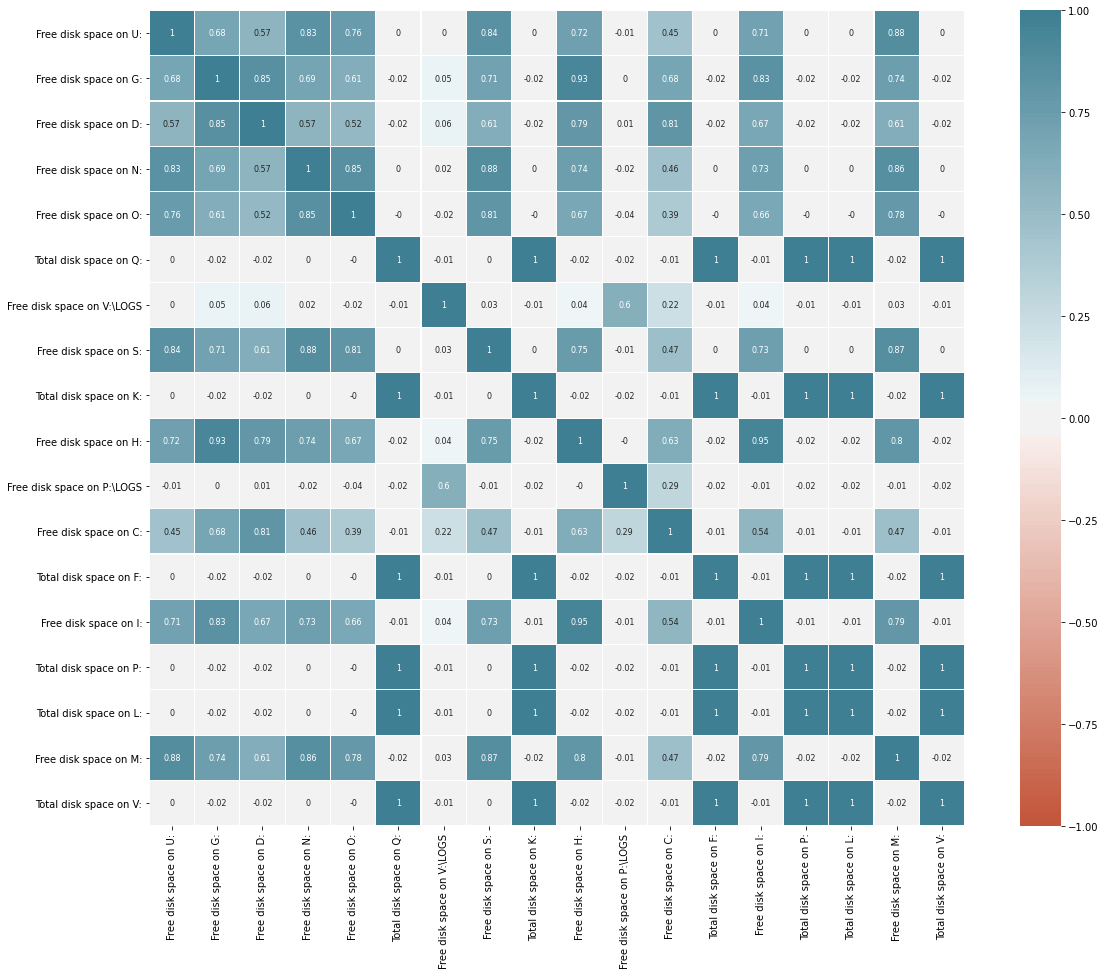

In [631]:
# correlation_analysis(df_11_2020_06_17_Normal)

In [632]:
df_11_2020_06_20_Anomaly = data_11[(data_11.index > '2020-06-20 00:00:00') & (data_11.index < '2020-06-21 00:00:00') & (data_11.Anomaly == -1)][buffer_col + disk_space_col + traffic_col]

df_11_2020_06_20_Normal = data_11[(data_11.index > '2020-06-20 00:00:00') & (data_11.index < '2020-06-21 00:00:00') & (data_11.Anomaly == 1)][buffer_col + disk_space_col + traffic_col]

In [633]:
df_11_2020_06_20_Anomaly.shape

(6, 87)

In [634]:
df_11_2020_06_20_Normal.shape

(1433, 87)

#### Done ####


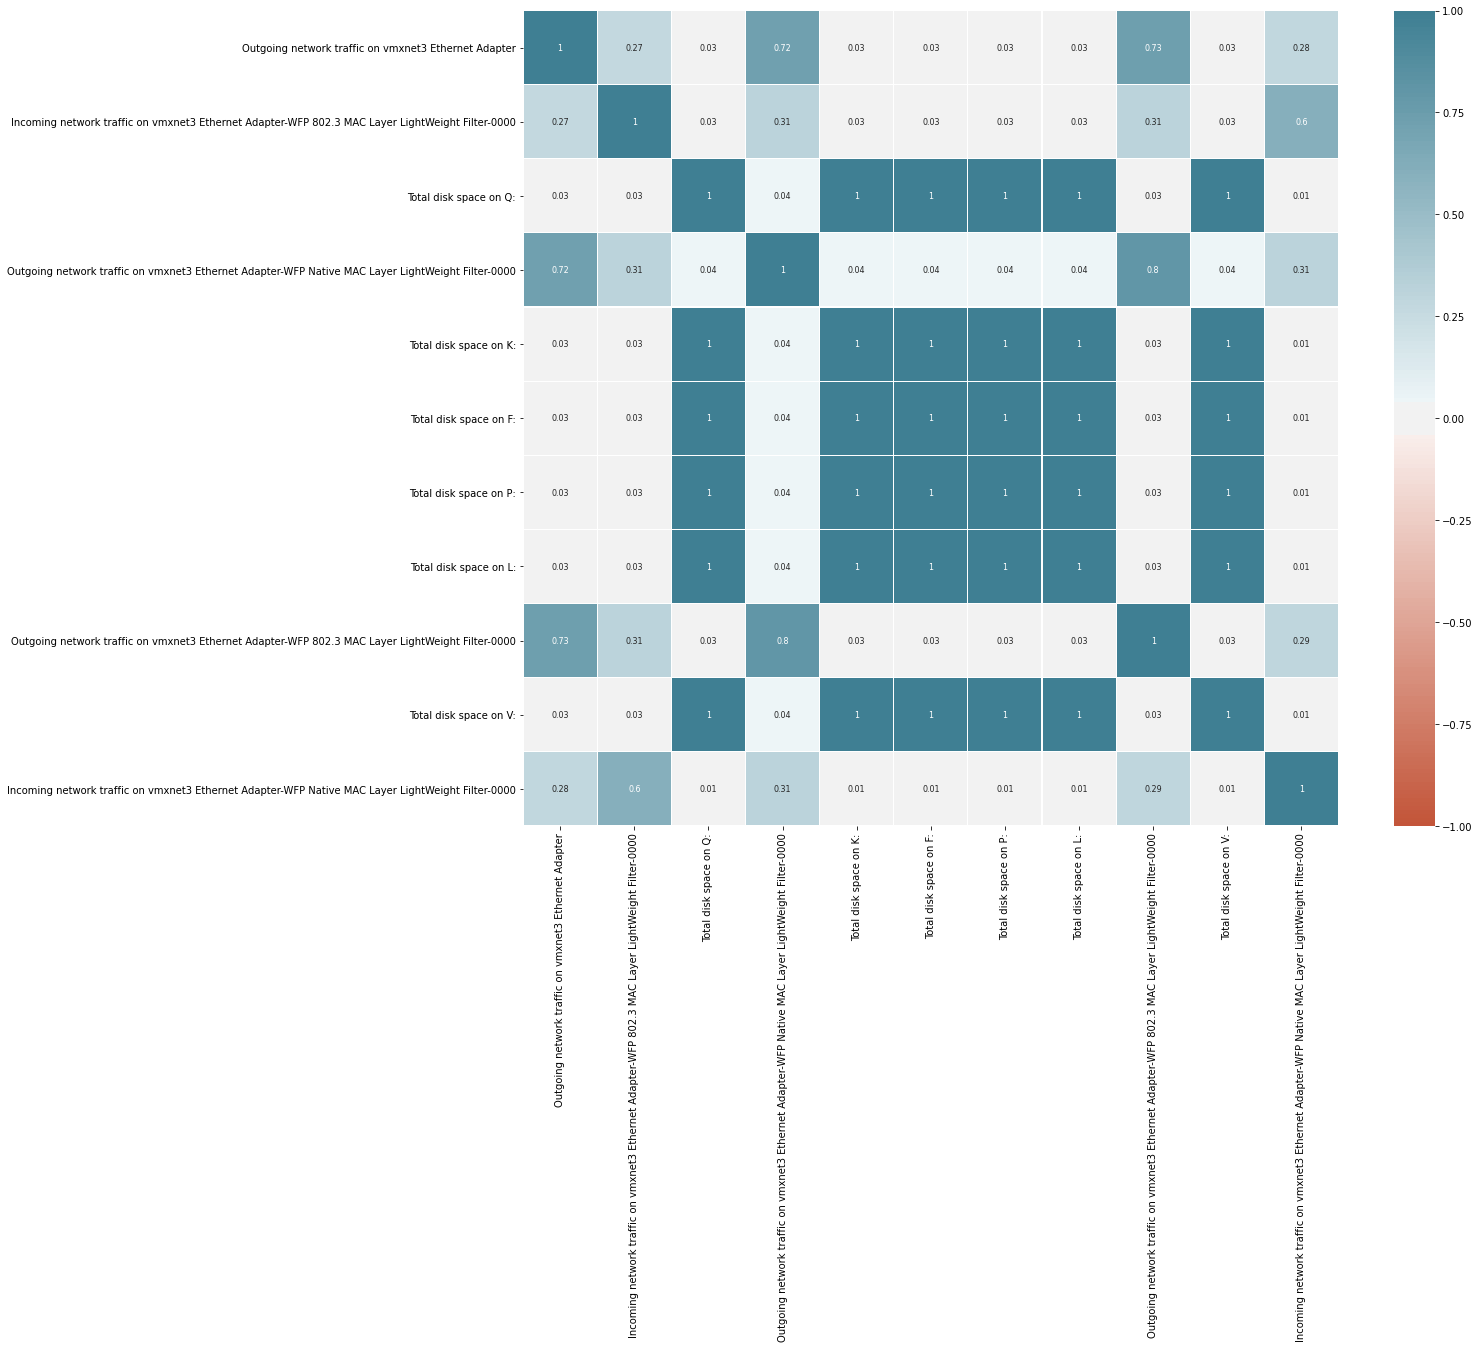

In [635]:
# correlation_analysis(df_11_2020_06_20_Normal)

#### Done ####


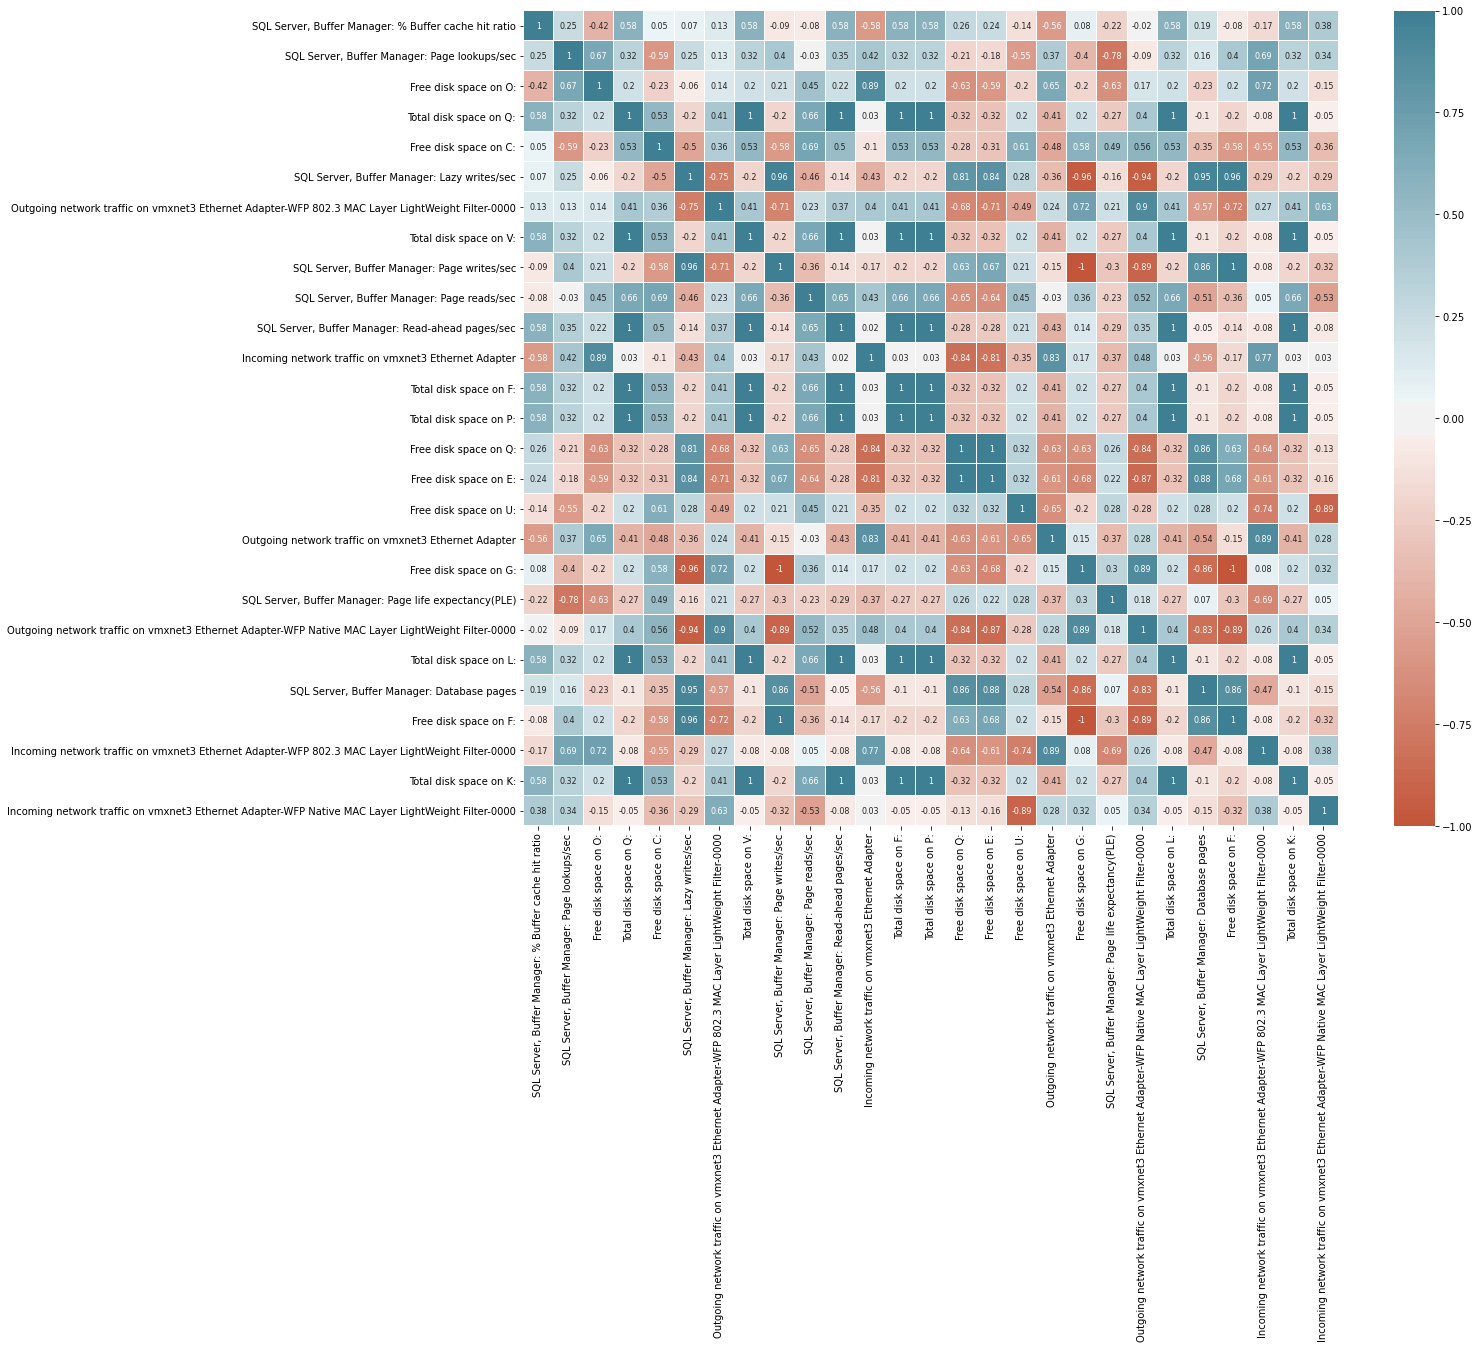

In [636]:
# correlation_analysis(df_11_2020_06_20_Anomaly)

In [637]:
buffer_col

['SQL Server, Buffer Manager: Lazy writes/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Buffer Manager: Target pages',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'SQL Server, Buffer Manager: Page writes/sec',
 'SQL Server, Buffer Manager: Page reads/sec',
 'SQL Server, Buffer Manager: Free list stalls/sec',
 'SQL Server, Buffer Manager: Page lookups/sec',
 'SQL Server, Buffer Manager: % Buffer cache hit ratio']

In [638]:
sql_col

['SQL Server, Locks: Lock Waits per second (Total)',
 'SQL Server, Buffer Manager: Page reads/sec',
 'SQL Server, Locks: Number of Deadlocks/sec (Total)',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'SQL Server, Statistics: Failed Auto-Params/sec',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'SQL Server, Errors: Errors/sec (DB Offline Errors)',
 'SQL Server, Buffer Manager: Free list stalls/sec',
 'SQL Server, Cache: Cache Pages',
 'SQL Server: Logins/sec',
 'SQL Server, Statistics: Unsafe Auto-Params/sec',
 'SQL Server, Buffer Manager: Page lookups/sec',
 'SQL Server, Access Methods: Work files created/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Memory Manager: Total Server Memory',
 'SQL Server: % Processor Time',
 'SQL Server, Statistics: SQL Re-Compilations/sec',
 'SQL Server, Statistics: Safe Auto-Params/sec',
 'SQL Server, Statistics: SQL Compilations/Sec',
 'SQL Server, Access Me

In [639]:
traffic_col

['Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000',
 'Incoming network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000',
 'Incoming network traffic on vmxnet3 Ethernet Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000',
 'Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000',
 'Outgoing network traffic on Microsoft Kernel Debug Network Adapter',
 'Incoming network traffic on vmxnet3 Ethernet Adapter',
 'Outgoing network traffic on vmxnet3 Ethernet Adapter',
 'Incoming network traffic on Microsoft Kernel Debug Network Adapter']

In [645]:
data_buffer.head()

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio",Anomaly,Decision_Score
Date_Time,,,,,,,,,,,,,
2020-06-16 05:17:00,0.0,0.0000,65503232.0,2638141.0,138.7611,0.0,0.0,0.0,0.0,10686.0734,100.0000,1,-0.020682
2020-06-16 05:18:00,0.0,0.0000,65503232.0,2637893.0,138.7611,0.0,0.0,0.0,0.0,9854.2941,100.0000,1,-0.020682
2020-06-16 05:19:00,0.0,0.0000,65503232.0,2637142.0,138.7611,0.0,0.0,0.0,0.0,46573.2623,100.0000,1,-0.020682
2020-06-16 05:20:00,0.0,0.0000,65503232.0,2637250.0,138.7611,0.0,0.0,0.0,0.0,4840.1745,100.0000,1,-0.020682
2020-06-16 05:21:00,0.0,6.8867,65503232.0,2632688.0,138.7611,0.0,0.0,0.0,0.0,37538.5796,99.9918,1,-0.077679


In [679]:
data_11.shape

(45270, 137)

In [681]:
data_11_scaled.shape

(45270, 135)

# Correlation of all df

In [699]:
df_11.isnull().sum().sum()

0

In [700]:
df_11.shape

(45270, 135)

#### Done ####


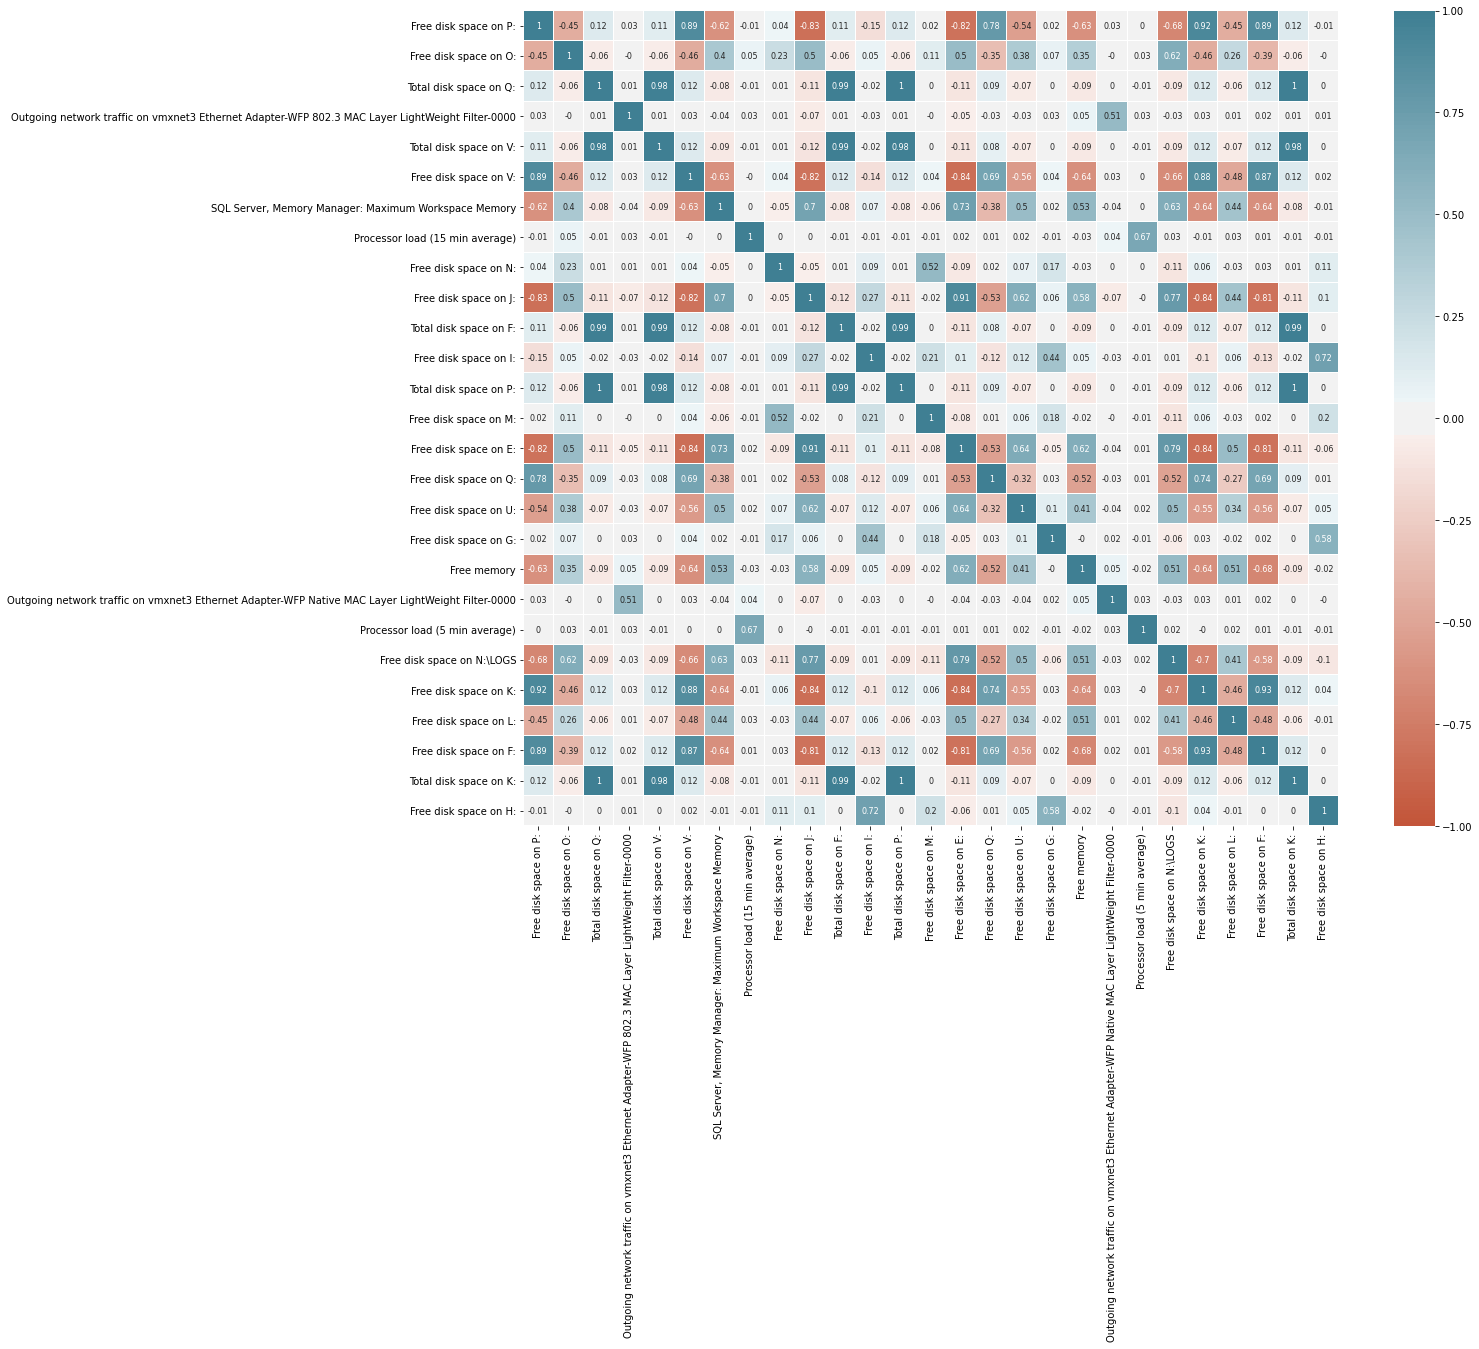

In [701]:
correlation_analysis(df_11)

# Scaling for MinMax

In [703]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

In [683]:
min_max_scaler = MinMaxScaler()

In [684]:
df_11.shape

(45270, 135)

In [685]:
data_11.index.name

'Date_Time'

In [688]:
# data_11.iloc[:,:-2].head(1)

In [689]:
min_max_df = data_11.iloc[:,:-2]

In [691]:
min_max_df.index.name

'Date_Time'

In [692]:
data_11_min_max_scaled = min_max_scaler.fit_transform(min_max_df.values)

In [694]:
data_11_min_max_scaled_df = pd.DataFrame(data = data_11_min_max_scaled, columns = min_max_df.columns, index = min_max_df.index)

In [696]:

data_11_min_max_scaled_df.to_csv("/home/ubuntu/Zabbix/Data/MODEL_DATA/SRV_FR_SQLN_11/SRV_FR_SQLN_11_MIN_MAX_SCALED.csv")

# Standard Scaler

In [708]:
std_scaler = StandardScaler()


In [709]:
data_11_std_scaled = std_scaler.fit_transform(data_11.iloc[:,:-2].values)

In [710]:
data_11_std_scaled

array([[-5.86577210e-14,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.48551122e-01, -1.31366320e+00],
       [-5.86577210e-14,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.48551122e-01,  1.37650238e-01],
       [-5.86577210e-14,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.48551122e-01, -1.47204121e+00],
       ...,
       [-5.86577210e-14,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.48551122e-01,  8.64612477e-01],
       [-5.86577210e-14,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -2.09661672e-14,  3.54540320e-01],
       [-5.86577210e-14,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.48551122e-01,  4.57987091e-01]])

In [711]:
data_11_min_max_scaled_df = pd.DataFrame(data = data_11_std_scaled, columns = min_max_df.columns, index = min_max_df.index)

In [713]:
# data_11_min_max_scaled_df.to_csv("/home/ubuntu/Zabbix/Data/MODEL_DATA/SRV_FR_SQLN_11/SRV_FR_SQLN_11_STD_SCALED.csv")

In [ ]:
data_11_min_max_scaled_df

# SHAP

In [ ]:
import shap

In [ ]:
data.head()